In [1]:
# Project Introduction
# Objective: Develop a machine learning model to predict house prices using a dataset containing various 
# house-related features.
# Dataset: You will use the "House Prices - Advanced Regression Techniques" dataset from Kaggle 
# (or any other relevant house price dataset).


## Introduction of The Problem Case


Problem Case:
The primary problem case we are addressing is understanding and predicting disparities in house prices across California. Housing prices vary significantly across locations due to multiple factors, including:

1. Geographical Factors: Different neighbourhoods have varying levels of desirability, affecting housing prices.
2. Population Density: Areas with high population density often have different price trends compared to less densely populated areas.
3. Socio-Economic Conditions: Economic conditions and income levels affect housing affordability and pricing.

Understanding these disparities is crucial for various stakeholders, including real estate investors, home buyers, policy makers, and financial institutions.

## Business Case for the ML Model

Objective:
 The objective of this project is to build a robust machine learning model to accurately predict house prices (median house values) and understand disparities in different areas in California. By addressing regional disparities in house prices, the project provides a valuable predictive tool that benefits stakeholders by offering insights into different housing markets within California, enabling more informed decision-making and effective policy formulation.

The business case includes but not limited to:

1. Real Estate Investors: They can use the model to make informed decisions by understanding regional market trends and identifying potential investment opportunities.
2. Home Buyers: The model can help them find affordable housing options in desired locations, considering regional variations.
3. Policy Makers: Insights from the model can assist in urban planning, housing policies, and addressing housing affordability issues in different regions.
3. Financial Institutions: The model provides valuable data for assessing the risk associated with housing loans in various regions.

## Project Phases

### Phase 1: Data Collection and Preparation

In [2]:
# Task 1.1: Download the dataset from Kaggle or another source.
# Task 1.2: Load the dataset into a Pandas DataFrame.
# Task 1.3: Inspect the dataset for missing values and handle them appropriately.
# Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis.


In [3]:
# California Housing Prices Dataset downloaded from kaggle 
# To load the dataset, first import the pandas library
# Import the necessary libraries for data manipulation, analysis and visualization

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the CSV file
# This reads the data into a pandas DataFrame

housing_data = pd.read_csv('housing.csv')

In [5]:
# Display the first five rows of the DataFrame
# A history of house prices in California
# This helps to verify that the data has been loaded correctly
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
# Display the column names of the DataFrame
# This helps to understand the structure and identify the columns present in the dataset
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
# Inspect the dataset for missing values and handle them appropriately.

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Data Cleaning
# Handling missing values
# From the info above, we can see that most values have 20640 non-null values, only the total_bedrooms have 20433,
# which is a problem, to fix our data, we will use imputers (median) to fill in the nan values,
# This process ensures that all missing values in the total_bedrooms column are filled, allowing for a complete
# dataset ready for further analysis and modeling.

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Check initial missing values
missing_values = housing_data['total_bedrooms'].isnull().sum()
print(f'Missing values in total_bedrooms: {missing_values}')



Missing values in total_bedrooms: 207


In [10]:
# Create the imputer with median strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer and transform the data
housing_data['total_bedrooms'] = imputer.fit_transform(housing_data[['total_bedrooms']])

# Verify the imputation
missing_values_after = housing_data['total_bedrooms'].isnull().sum()
print(f'Missing values in total_bedrooms after imputation: {missing_values_after}')


Missing values in total_bedrooms after imputation: 0


In [11]:
# Check our new data
# Now, our dataset is ready for analysis.

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Phase 2: Exploratory Data Analysis (EDA)

In [12]:
# Task 2.1: Conduct exploratory data analysis to understand the distribution of features 
# and the target variable (house prices).
# Task 2.2: Visualize the relationships between features and the target variable using scatter plots, 
# histograms, and box plots.
# Task 2.3: Identify and handle outliers in the dataset.


In [13]:
# This exploratory aanalysis will be looking into total_rooms, total_bedrooms, population density, median_income, 
# ocean_proximity, and housing_median_age and how they affect the housing pricing (median_house_value) in California.
# We will be working on these assumptions (probelms and hypotheses) to gain a detailed insight on our data.

#Business Problems and Hypotheses
#Business Problems:

# 1. How does the size of a house, measured by the number of total rooms and bedrooms, influence the house price ?
# 2. How does proximity to the ocean affect house prices?
# 3. Is there a correlation between median income and house prices?
# 4. Does the age of houses impact their market value?
# 5. How do population and household characteristics (total rooms, total bedrooms, households) affect house prices?

# Hypotheses:
# 1. Larger houses (with more total rooms and bedrooms) have higher house prices.
# 2. Houses closer to the ocean are more expensive.
# 3. Higher median income leads to higher house prices.
# 4. Older houses have lower market value compared to newer houses.
# 5. Areas with higher population density have lower house prices due to increased demand and limited supply.

In [14]:
# Display summary statistics to get an overview of the numerical features.
# This includes count, mean, standard deviation, min, and max values for each column

housing_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [15]:
# check out the object datatype 

housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

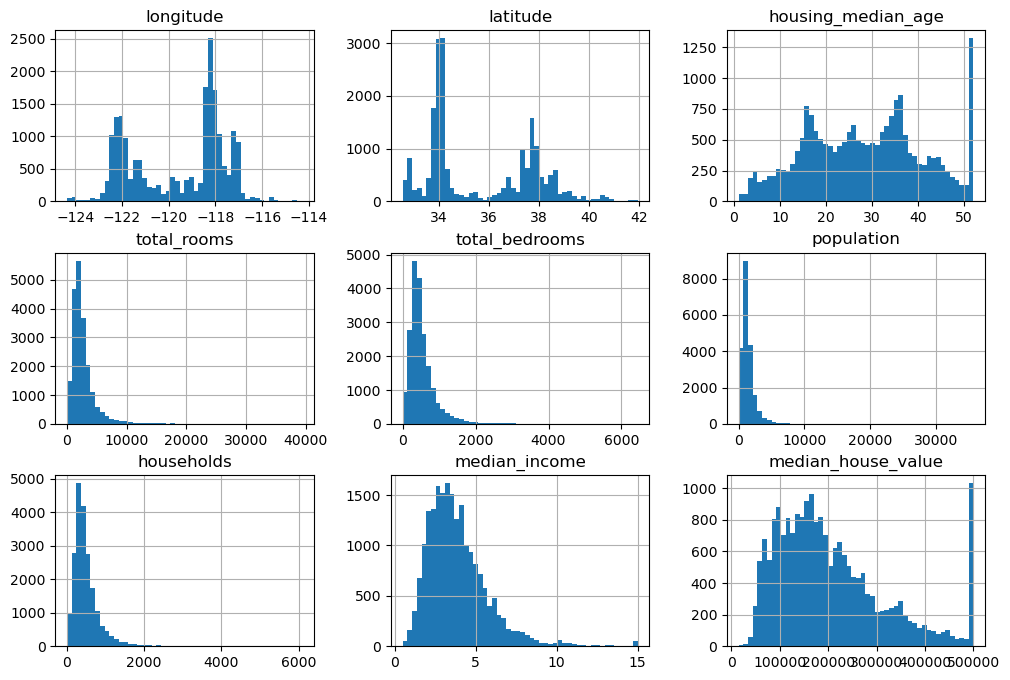

In [16]:
# Get a feel of our data by visualizing
# Let's do a basic exploration of the numeric features
housing_data.hist(bins=50, figsize=(12,8))
plt.show()

In [17]:
# One crucial step for EDA is Visualisation
# Why? It helps in deriving business intuitions

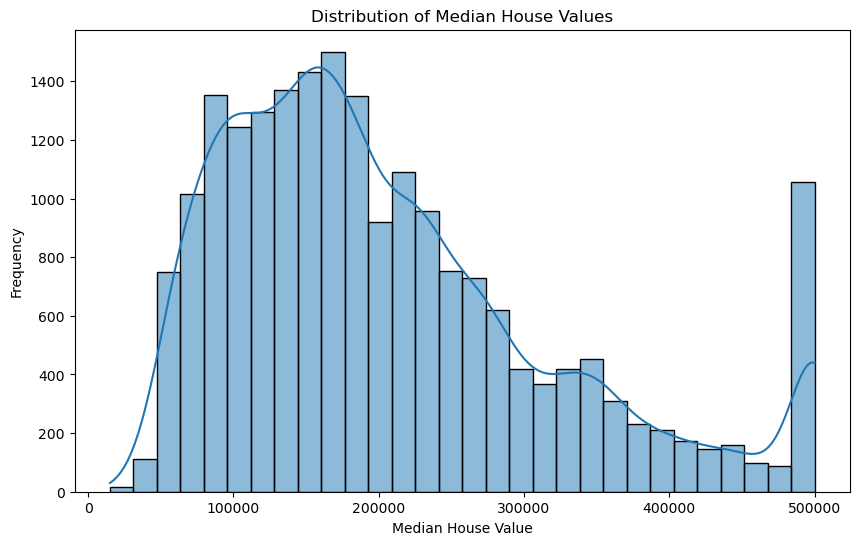

In [18]:
# To get started, let's show a distribution of the target variable and explore our data

# Distribution of the target variable (median_house_value)
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['median_house_value'], kde=True, bins=30)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Exploration of the housing_data and a detailed look into our target variable ('median_house_value')

In [20]:
# Use Pandas methods .groupby, .agg, .reset_index
# This will show the unique values in the 'median_house_value' column (the target variable)

housing_data['median_house_value'].unique()

array([452600., 358500., 352100., ..., 455500., 200700.,  47000.])

In [21]:
# Creating new features for housing data based on the quantile values
# Here, we will create filters that will categorize the 'median_house_value' into numerical ranges for easy analysis and
# interpretation- allowing for more focused and relevant analysis.

# Define filters based on house price ranges.

# let's filter the data to get houses with median_house_value below $119,600, between $119,600 and $179,700,
# between $179,700 and $264,725, between $264,725 and $500,000, and above $500,000

housing_data['median_house_value_class'] = 'Cheap'

housing_data.loc[(housing_data['median_house_value'] >= 119600) & (housing_data['median_house_value'] < 179700), 'median_house_value_class'] = 'Affordable'

housing_data.loc[(housing_data['median_house_value'] >= 179700) & (housing_data['median_house_value'] < 264725), 'median_house_value_class'] = 'Moderate'

housing_data.loc[(housing_data['median_house_value'] >= 264725) & (housing_data['median_house_value'] <= 500000), 'median_house_value_class'] = 'Expensive'

housing_data.loc[housing_data['median_house_value'] > 500000, 'median_house_value_class'] = 'Luxury'

housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  median_house_value_class  
0                Expensive  
1                Expensive  
2                Expensive  
3                Expensive  
4                Expensive

In [22]:
# Calculating the houses under each quantile 
median_house_value_Tot = housing_data.groupby(['median_house_value_class'])['median_house_value'].agg(
    median_house_value_grp ='count').reset_index()
median_house_value_Tot

median_house_value_class  median_house_value_grp
0               Affordable                    5159
1                    Cheap                    5156
2                Expensive                    4195
3                   Luxury                     965
4                 Moderate                    5165

In [23]:
# Visualize the relationship between median_house_value and the count of 'value_class' using a bar chart in altair

import altair as alt 
alt.Chart(median_house_value_Tot).mark_bar().encode(x='median_house_value_class', y='median_house_value_grp').properties(title='Count of Prices by Value Class')


alt.Chart(...)

In [24]:
# Calculating the total houses categorised as per quantile and propensity classification

median_house_value_Prop = housing_data.groupby(['median_house_value_class', 'median_house_value'])['median_house_value'].agg(median_house_value_Cat='count').reset_index()
median_house_value_Prop.head()

median_house_value_class  median_house_value  median_house_value_Cat
0               Affordable            119600.0                       6
1               Affordable            119700.0                       2
2               Affordable            119800.0                       8
3               Affordable            119900.0                       5
4               Affordable            120000.0                      13

In [25]:
# Merge the two DataFrames on 'median_house_value_class'
median_house_value_Comb = pd.merge(median_house_value_Prop, median_house_value_Tot, on='median_house_value_class')

# Calculate the category proportion
median_house_value_Comb['catProp'] = (median_house_value_Comb['median_house_value_Cat'] /median_house_value_Comb['median_house_value_grp']) * 100

# Display the first few rows of the merged data
median_house_value_Comb.head()

median_house_value_class  median_house_value  median_house_value_Cat  \
0               Affordable            119600.0                       6   
1               Affordable            119700.0                       2   
2               Affordable            119800.0                       8   
3               Affordable            119900.0                       5   
4               Affordable            120000.0                      13   

   median_house_value_grp   catProp  
0                    5159  0.116302  
1                    5159  0.038767  
2                    5159  0.155069  
3                    5159  0.096918  
4                    5159  0.251987

In [26]:
# Visualize the relationship using Altair, with facets for median_house_value_class categories
# here, we want to see the house prices (median_house-value) under each value class.
 
alt.Chart(median_house_value_Comb).mark_bar().encode(x='median_house_value',
                                                     y='catProp').facet(column='median_house_value_class').properties(
    title='Proportion of House Pricing by Median House Value Class')

alt.FacetChart(...)

### A look into our first Business Problem and hypothesis

In [27]:
# 1st Business Problem & Hypothesis: 
# How does the size of a house, measured by the number of total rooms and bedrooms, influence the house price ?
# Larger houses (with more total rooms and bedrooms) have higher house prices.

In [28]:
# Display the first 5 rows of the 'total_rooms', 'total_bedrooms', 'median_house_value' and 'median_house_value_class' 
# columns in the bank_data DataFrame
# This helps to quickly inspect the data and verify the values in these specific columns

housing_data[['total_rooms', 'total_bedrooms', 'median_house_value', 'median_house_value_class']].head()

total_rooms  total_bedrooms  median_house_value median_house_value_class
0        880.0           129.0            452600.0                Expensive
1       7099.0          1106.0            358500.0                Expensive
2       1467.0           190.0            352100.0                Expensive
3       1274.0           235.0            341300.0                Expensive
4       1627.0           280.0            342200.0                Expensive

In [29]:
 # Display summary statistics for total_rooms and median house value
housing_data[['total_rooms', 'median_house_value']].describe()

total_rooms  median_house_value
count  20640.000000        20640.000000
mean    2635.763081       206855.816909
std     2181.615252       115395.615874
min        2.000000        14999.000000
25%     1447.750000       119600.000000
50%     2127.000000       179700.000000
75%     3148.000000       264725.000000
max    39320.000000       500001.000000

In [30]:
# Display summary statistics for total_bedrooms and median house value
housing_data[['total_bedrooms', 'median_house_value']].describe()

total_bedrooms  median_house_value
count    20640.000000        20640.000000
mean       536.838857       206855.816909
std        419.391878       115395.615874
min          1.000000        14999.000000
25%        297.000000       119600.000000
50%        435.000000       179700.000000
75%        643.250000       264725.000000
max       6445.000000       500001.000000

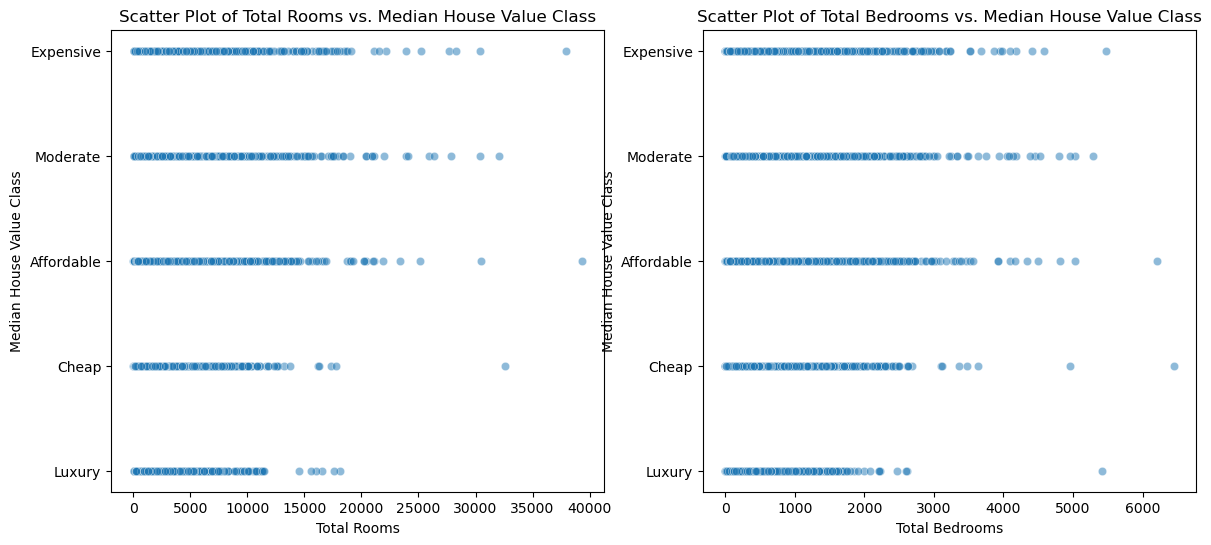

In [31]:
# Scatter plot for total rooms vs. house prices for more insight on our features and the targeted variable
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='total_rooms', y='median_house_value_class', data=housing_data, alpha=0.5)
plt.title('Scatter Plot of Total Rooms vs. Median House Value Class')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value Class')

# Scatter plot for total bedrooms vs. house prices
plt.subplot(1, 2, 2)
sns.scatterplot(x='total_bedrooms', y='median_house_value_class', data=housing_data, alpha=0.5)
plt.title('Scatter Plot of Total Bedrooms vs. Median House Value Class')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value Class')

plt.show()



In [32]:
# Calculate correlation coefficients to show how these features affect the house pricing in California.

corr_rooms = housing_data['total_rooms'].corr(housing_data['median_house_value'])
corr_bedrooms = housing_data['total_bedrooms'].corr(housing_data['median_house_value'])

print(f'Correlation coefficient between total rooms and median house value: {corr_rooms}')
print(f'Correlation coefficient between total bedrooms and median house value: {corr_bedrooms}')


Correlation coefficient between total rooms and median house value: 0.134153113806563
Correlation coefficient between total bedrooms and median house value: 0.049456861920854585


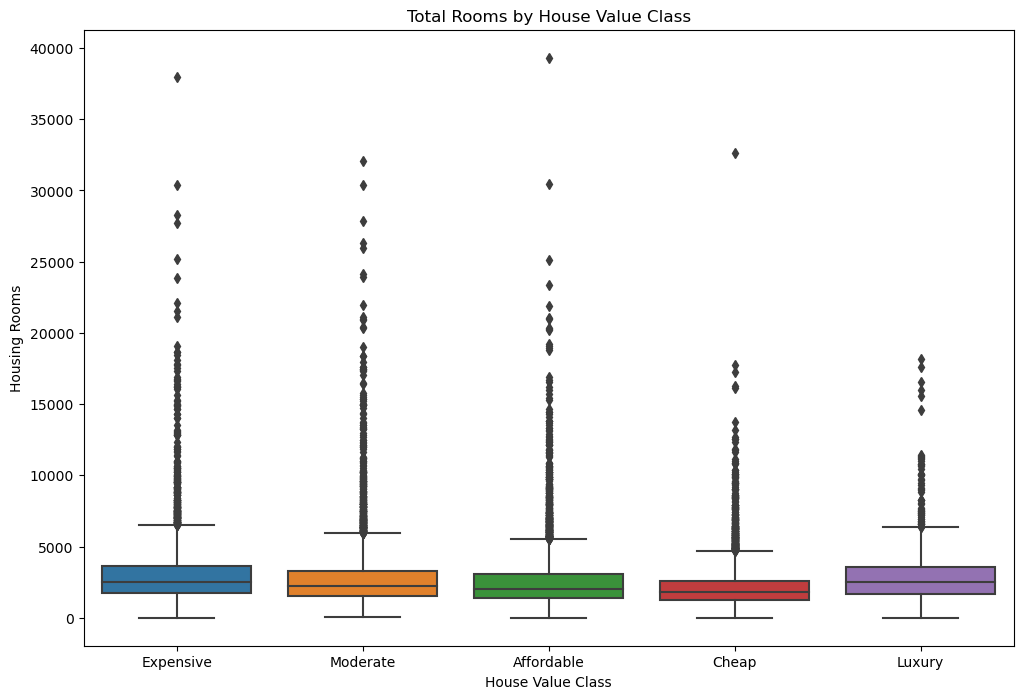

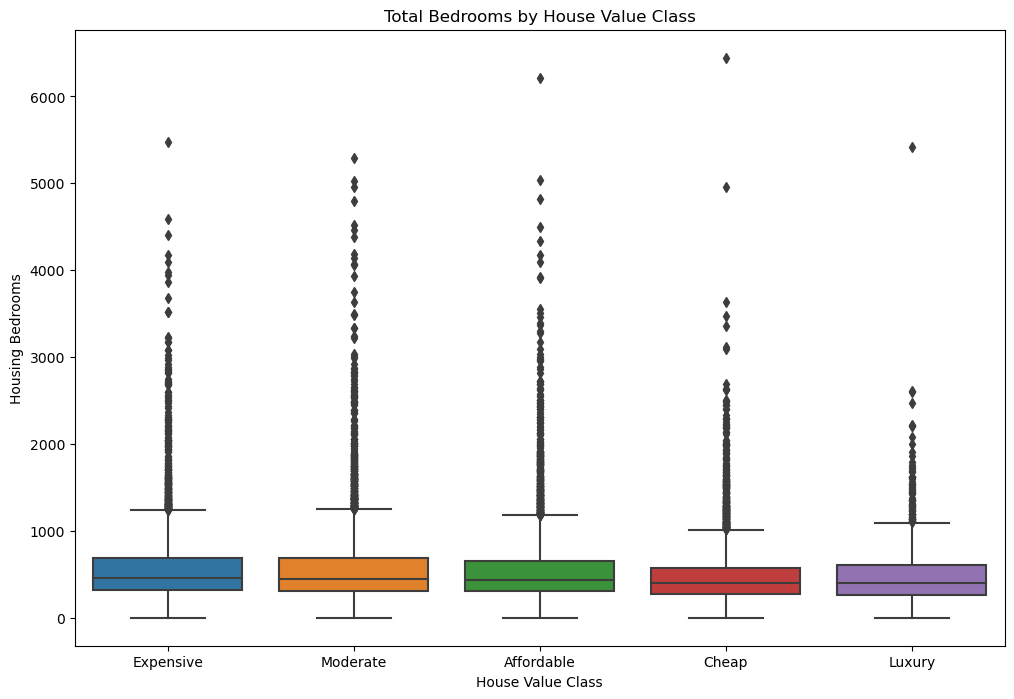

In [33]:
# for total_rooms
# Visualize the relationships between total_rooms and median_house_value_class for more insight

# Box plot of 'total_rooms' vs 'median_house_value_class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='median_house_value_class', y='total_rooms', data=housing_data)
plt.title('Total Rooms by House Value Class')
plt.xlabel('House Value Class')
plt.ylabel('Housing Rooms')
plt.show()

# for total_bedrooms
# Visualize the relationships between total_bedrooms and median_house_value for more insight

# Box plot of 'total_rooms' vs 'median_house_value_class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='median_house_value_class', y='total_bedrooms', data=housing_data)
plt.title('Total Bedrooms by House Value Class')
plt.xlabel('House Value Class')
plt.ylabel('Housing Bedrooms')
plt.show()

In [34]:
# How does the size of a house, measured by the number of total_rooms influence the house price ?
# Group the entire dataset by 'total_rooms' and count the number of occurrences for each total_rooms


total_rooms_class_counts = housing_data.groupby(['total_rooms', 'median_house_value_class']).size().reset_index(name='total_rooms_class_count')
total_rooms_class_counts.head()

total_rooms median_house_value_class  total_rooms_class_count
0          2.0               Affordable                        1
1          6.0                    Cheap                        1
2          8.0                   Luxury                        1
3         11.0               Affordable                        1
4         12.0                    Cheap                        1

In [35]:
# Group the data by 'total_rooms' and total count the occurrences for each room
total_rooms_total_counts = housing_data.groupby('total_rooms').size().reset_index(name='total_rooms_grp')
total_rooms_total_counts.head()

total_rooms  total_rooms_grp
0          2.0                1
1          6.0                1
2          8.0                1
3         11.0                1
4         12.0                1

In [36]:
# Visualize the relationship between total_rooms and the count of 'median house value class' using a bar chart in altair

# Sample 5000 rows from the dataset
sampled_data1 = total_rooms_class_counts.sample(n=5000, random_state=42)


alt.Chart(sampled_data1).mark_bar().encode(x='total_rooms', y='median_house_value_class').properties(title='Count of Rooms by Class Type')


alt.Chart(...)

In [37]:
# Group the entire dataset by 'total_rooms' and count the total number of occurrences for each room
total_roomsTot = housing_data.groupby('total_rooms')['median_house_value_class'].agg(total_roomsTot= 'count').reset_index()

# Display the first few rows of the grouped data
total_roomsTot.head()

total_rooms  total_roomsTot
0          2.0               1
1          6.0               1
2          8.0               1
3         11.0               1
4         12.0               1

In [38]:
# Group the data by both 'total_rooms' and 'median_house_value' to get counts for each class
total_roomsProp = housing_data.groupby(['total_rooms', 'median_house_value_class'])['median_house_value_class'].agg(total_roomsCat='count').reset_index()

# Display the first few rows of the grouped data
total_roomsProp.head()

total_rooms median_house_value_class  total_roomsCat
0          2.0               Affordable               1
1          6.0                    Cheap               1
2          8.0                   Luxury               1
3         11.0               Affordable               1
4         12.0                    Cheap               1

In [39]:
# Merge total_roomsTot and total_roomsProp  to combine total counts and class counts
total_roomsComb = pd.merge(total_roomsProp, total_roomsTot, left_on=['total_rooms'], right_on=['total_rooms'])

# Calculate the proportion of each class within each total_rooms group
total_roomsComb['catProp'] = (total_roomsComb.total_roomsCat / total_roomsComb.total_roomsTot) * 100

# Display the first few rows of the combined data
total_roomsComb.head()

total_rooms median_house_value_class  total_roomsCat  total_roomsTot  \
0          2.0               Affordable               1               1   
1          6.0                    Cheap               1               1   
2          8.0                   Luxury               1               1   
3         11.0               Affordable               1               1   
4         12.0                    Cheap               1               1   

   catProp  
0    100.0  
1    100.0  
2    100.0  
3    100.0  
4    100.0

In [40]:
 # Aggregate total_rooms to reduce the number of rows
# Why ? The number of rows in our dataset is greater than the maximum allowed (5000) for this visualization.

housing_data['total_rooms_bins'] = pd.cut(housing_data['total_rooms'], bins=10)
housing_data['total_rooms_bins'] = housing_data['total_rooms_bins'].astype(str)

# Group the data by 'total_rooms_bins' and 'median_house_value_class'
total_rooms_class_counts_agg = housing_data.groupby(['total_rooms_bins', 'median_house_value_class']).size().reset_index(name='total_rooms_class_count')
total_rooms_total_counts_agg = housing_data.groupby('total_rooms_bins').size().reset_index(name='total_rooms_grp')

# Merge the two DataFrames on 'total_rooms_bins'
total_rooms_data_agg = pd.merge(total_rooms_class_counts_agg, total_rooms_total_counts_agg, on='total_rooms_bins')

# Calculate the proportion of each 'median_house_value_class' within each 'total_rooms_bins' category
total_rooms_data_agg['catProp'] = (total_rooms_data_agg['total_rooms_class_count'] /total_rooms_data_agg['total_rooms_grp']) * 100

# Display the first few rows of the aggregated data
total_rooms_data_agg.head()

total_rooms_bins median_house_value_class  total_rooms_class_count  \
0  (-37.318, 3933.8]               Affordable                     4422   
1  (-37.318, 3933.8]                    Cheap                     4701   
2  (-37.318, 3933.8]                Expensive                     3304   
3  (-37.318, 3933.8]                   Luxury                      778   
4  (-37.318, 3933.8]                 Moderate                     4320   

   total_rooms_grp    catProp  
0            17525  25.232525  
1            17525  26.824536  
2            17525  18.853067  
3            17525   4.439372  
4            17525  24.650499

In [41]:
# Create a bar chart to show the distribution of median house value classes within each total_rooms category
total_rooms_chart_agg = alt.Chart(total_rooms_data_agg).mark_bar().encode(
    x=alt.X('total_rooms_bins:N', title='Total Rooms Bins'),
    y=alt.Y('catProp', title='Proportion (%)'),
    color=alt.Color('median_house_value_class:N', title='House Value Class'),
    tooltip=['total_rooms_bins', 'median_house_value_class', 'catProp']
).facet(
    column='median_house_value_class:N'
).properties(
    title='Proportion of Median House Value Class by Total Rooms'
).resolve_scale(
    y='independent'
)

# Display the chart
total_rooms_chart_agg


alt.FacetChart(...)

In [42]:
# For total_bedrooms
# How does the size of a house, measured by the number of total_bedrooms influence the house price ?
# Group the entire dataset by 'total_bedrooms' and count the number of occurrences for each total_bedrooms

total_bedrooms_class_counts = housing_data.groupby(['total_bedrooms', 'median_house_value_class']).size().reset_index(name='total_bedrooms_class_count')
total_bedrooms_class_counts.head()

total_bedrooms median_house_value_class  total_bedrooms_class_count
0             1.0                   Luxury                           1
1             2.0               Affordable                           1
2             2.0                    Cheap                           1
3             3.0                Expensive                           4
4             3.0                 Moderate                           1

In [43]:
# Group the data by 'total_bedrooms' and count the occurrences for each bedroom
total_bedrooms_total_counts = housing_data.groupby('total_bedrooms').size().reset_index(name='total_bedrooms_grp')
total_bedrooms_total_counts.head()

total_bedrooms  total_bedrooms_grp
0             1.0                   1
1             2.0                   2
2             3.0                   5
3             4.0                   7
4             5.0                   6

In [44]:
# Visualize the relationship between total_bedrooms and the count of 'median house value class' using a bar chart in altair

# Sample 5000 rows from the dataset
sampled_data2 = total_bedrooms_class_counts.sample(n=5000, random_state=42)


alt.Chart(sampled_data2).mark_bar().encode(x='total_bedrooms', y='median_house_value_class').properties(title='Count of Bedrooms by Class Type')


alt.Chart(...)

In [45]:
# Group the entire dataset by 'total_bedrooms' and count the number of occurrences for each bedroom
total_bedroomsTot = housing_data.groupby('total_bedrooms')['median_house_value_class'].agg(total_bedroomsTot= 'count').reset_index()

# Display the first few rows of the grouped data
total_bedroomsTot.head()

total_bedrooms  total_bedroomsTot
0             1.0                  1
1             2.0                  2
2             3.0                  5
3             4.0                  7
4             5.0                  6

In [46]:
# Group the data by both 'total_bedrooms' and 'median_house_value' to get counts for each class
total_bedroomsProp = housing_data.groupby(['total_bedrooms', 'median_house_value_class'])['median_house_value_class'].agg(total_bedroomsCat='count').reset_index()

# Display the first few rows of the grouped data
total_bedroomsProp.head()

total_bedrooms median_house_value_class  total_bedroomsCat
0             1.0                   Luxury                  1
1             2.0               Affordable                  1
2             2.0                    Cheap                  1
3             3.0                Expensive                  4
4             3.0                 Moderate                  1

In [47]:
# Merge total_bedroomsTot and total_bedroomsProp  to combine total counts and class counts
total_bedroomsComb = pd.merge(total_bedroomsProp, total_bedroomsTot, left_on=['total_bedrooms'], right_on=['total_bedrooms'])

# Calculate the proportion of each class within each total_bedrooms group
total_bedroomsComb['catProp'] = (total_bedroomsComb.total_bedroomsCat / total_bedroomsComb.total_bedroomsTot) * 100

# Display the first few rows of the combined data
total_bedroomsComb.head()

total_bedrooms median_house_value_class  total_bedroomsCat  \
0             1.0                   Luxury                  1   
1             2.0               Affordable                  1   
2             2.0                    Cheap                  1   
3             3.0                Expensive                  4   
4             3.0                 Moderate                  1   

   total_bedroomsTot  catProp  
0                  1    100.0  
1                  2     50.0  
2                  2     50.0  
3                  5     80.0  
4                  5     20.0

In [48]:
 # Aggregate total_bedrooms to reduce the number of rows
# Why ? The number of rows in our dataset is greater than the maximum allowed (5000) for this visualization.

housing_data['total_bedrooms_bins'] = pd.cut(housing_data['total_bedrooms'], bins=10)
housing_data['total_bedrooms_bins'] = housing_data['total_bedrooms_bins'].astype(str)

# Group the data by 'total_bedrooms_bins' and 'median_house_value_class'
total_bedrooms_class_counts_agg = housing_data.groupby(['total_bedrooms_bins', 'median_house_value_class']).size().reset_index(name='total_bedrooms_class_count')
total_bedrooms_total_counts_agg = housing_data.groupby('total_bedrooms_bins').size().reset_index(name='total_bedrooms_grp')

# Merge the two DataFrames on 'total_bedrooms_bins'
total_bedrooms_data_agg = pd.merge(total_bedrooms_class_counts_agg, total_bedrooms_total_counts_agg, on='total_bedrooms_bins')

# Calculate the proportion of each 'median_house_value_class' within each 'total_bedrooms_bins' category
total_bedrooms_data_agg['catProp'] = (total_bedrooms_data_agg['total_bedrooms_class_count'] /total_bedrooms_data_agg['total_bedrooms_grp']) * 100

# Display the first few rows of the aggregated data
total_bedrooms_data_agg.head()

total_bedrooms_bins median_house_value_class  total_bedrooms_class_count  \
0     (-5.444, 645.4]               Affordable                        3830   
1     (-5.444, 645.4]                    Cheap                        4213   
2     (-5.444, 645.4]                Expensive                        3006   
3     (-5.444, 645.4]                   Luxury                         744   
4     (-5.444, 645.4]                 Moderate                        3718   

   total_bedrooms_grp    catProp  
0               15511  24.692154  
1               15511  27.161369  
2               15511  19.379795  
3               15511   4.796596  
4               15511  23.970086

In [49]:
# Create a bar chart to show the distribution of median house value classes within each total_bedrooms category
total_bedrooms_chart_agg = alt.Chart(total_bedrooms_data_agg).mark_bar().encode(
    x=alt.X('total_bedrooms_bins:N', title='Total Bedrooms Bins'),
    y=alt.Y('catProp', title='Proportion (%)'),
    color=alt.Color('median_house_value_class:N', title='House Value Class'),
    tooltip=['total_bedrooms_bins', 'median_house_value_class', 'catProp']
).facet(
    column='median_house_value_class:N'
).properties(
    title='Proportion of Median House Value Class by Total Bedrooms'
).resolve_scale(
    y='independent'
)

# Display the chart
total_bedrooms_chart_agg


alt.FacetChart(...)

In [50]:
# 👆🏽 Intuitions from the EDA
# our analysis show that total number of rooms and bedrooms are not the major indictor of high price of housing in California.
# Correlation between total rooms and median house value is 0.1342 while the
# Correlation between total bedrooms and median house value is 0.0495
# These values indicate that there is a weak positive correlation between the number of rooms/bedrooms and 
# the median house value. While the correlation is positive, this suggests that more rooms or bedrooms generally relate 
# to higher house prices, though the relationship is not strong.

### Our Second Business Problem and hypothesis

In [51]:
# 2nd Business Problem & Hypothesis: 
# How does proximity to the ocean affect house prices?
# Houses closer to the ocean are more expensive.

In [52]:
# Display the first 5 rows of the 'ocean proximity', 'median_house_value' and 'median_house_value_class' columns in the housing_data DataFrame
# This helps to quickly inspect the data and verify the values in these specific columns

housing_data[['ocean_proximity', 'median_house_value', 'median_house_value_class']].head() 

ocean_proximity  median_house_value median_house_value_class
0        NEAR BAY            452600.0                Expensive
1        NEAR BAY            358500.0                Expensive
2        NEAR BAY            352100.0                Expensive
3        NEAR BAY            341300.0                Expensive
4        NEAR BAY            342200.0                Expensive

In [53]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [54]:
# Group by 'ocean_proximity' and count the occurrences of each category

ocean_proximity_total_counts = housing_data.groupby('ocean_proximity').size().reset_index(name='ocean_proximity_grp')

# Display the resulting DataFrame
ocean_proximity_total_counts


ocean_proximity  ocean_proximity_grp
0       <1H OCEAN                 9136
1          INLAND                 6551
2          ISLAND                    5
3        NEAR BAY                 2290
4      NEAR OCEAN                 2658

In [55]:
# Visualize the relationship between ocean_proximity and the count of times using a bar chart in altair

alt.Chart(ocean_proximity_total_counts).mark_bar().encode(x='ocean_proximity', y='ocean_proximity_grp').properties(title='Count of Ocean Proximity by Proximity Type')


alt.Chart(...)

In [56]:
# Calculating the total ocean proximity houses under each quantile 
ocean_proximity_Tot = housing_data.groupby(['median_house_value_class'])['ocean_proximity'].agg(total_ocean_proximity_grp ='count').reset_index()
ocean_proximity_Tot

median_house_value_class  total_ocean_proximity_grp
0               Affordable                       5159
1                    Cheap                       5156
2                Expensive                       4195
3                   Luxury                        965
4                 Moderate                       5165

In [57]:
# Calculating the ocean_proximity categorised as per quantile and propensity classification
ocean_proximity_Prop = housing_data.groupby(['median_house_value_class', 'ocean_proximity'])['ocean_proximity'].agg(ocean_proximity_Cat='count').reset_index()
ocean_proximity_Prop.head()

median_house_value_class ocean_proximity  ocean_proximity_Cat
0               Affordable       <1H OCEAN                 2348
1               Affordable          INLAND                 1772
2               Affordable        NEAR BAY                  455
3               Affordable      NEAR OCEAN                  584
4                    Cheap       <1H OCEAN                  713

In [58]:
# Merge the two DataFrames on 'median_house_value_class'
ocean_proximity_Comb = pd.merge(ocean_proximity_Prop, ocean_proximity_Tot, on='median_house_value_class')

# Calculate the proportion of each 'ocean_proximity' within each 'median_house_value_class'
ocean_proximity_Comb['catProp'] = (ocean_proximity_Comb['ocean_proximity_Cat'] / ocean_proximity_Comb['total_ocean_proximity_grp']) * 100

# Display the first few rows of the merged data
ocean_proximity_Comb.head()


median_house_value_class ocean_proximity  ocean_proximity_Cat  \
0               Affordable       <1H OCEAN                 2348   
1               Affordable          INLAND                 1772   
2               Affordable        NEAR BAY                  455   
3               Affordable      NEAR OCEAN                  584   
4                    Cheap       <1H OCEAN                  713   

   total_ocean_proximity_grp    catProp  
0                       5159  45.512696  
1                       5159  34.347742  
2                       5159   8.819539  
3                       5159  11.320023  
4                       5156  13.828549

In [59]:
# Visualize the relationship using altair, with facets for Median House Value Class categories

alt.Chart(ocean_proximity_Comb).mark_bar().encode(x='ocean_proximity', y='catProp').facet(column='median_house_value_class').properties(
    title='Proportion of Median House Value Class by Ocean Proximity')

alt.FacetChart(...)

In [60]:
# 👆🏽 Intuitions from the EDA
# Our analysis show that ocean proximity affects the housing price in California.
# from our visualization, we can see that houses near the ocean are more under "Moderate", "Expensive" $ "Luxury" class
# while houses under the "cheap" class are mostly on the inland 

## 3rd Business Problem & Hypothesis: 

In [61]:
# 3rd Business Problem & Hypothesis: 
# Is there a correlation between median income and house prices?
# Higher median income leads to higher house prices.

In [62]:
# Display the first 5 rows of the 'median income', 'median_house_value_class' and 'median_house_value' columns in the housing_data DataFrame
# This helps to quickly inspect the data and verify the values in these specific columns

housing_data[['median_income', 'median_house_value', 'median_house_value_class']].head()

median_income  median_house_value median_house_value_class
0         8.3252            452600.0                Expensive
1         8.3014            358500.0                Expensive
2         7.2574            352100.0                Expensive
3         5.6431            341300.0                Expensive
4         3.8462            342200.0                Expensive

In [63]:
# Calculate correlation coefficients to show how median_income affect the house pricing in California.

corr_median_income = housing_data['median_income'].corr(housing_data['median_house_value'])
corr_median_income

0.6880752079585476

In [64]:
# Display summary statistics for median income and median house value
housing_data[['median_income', 'median_house_value']].describe()

median_income  median_house_value
count   20640.000000        20640.000000
mean        3.870671       206855.816909
std         1.899822       115395.615874
min         0.499900        14999.000000
25%         2.563400       119600.000000
50%         3.534800       179700.000000
75%         4.743250       264725.000000
max        15.000100       500001.000000

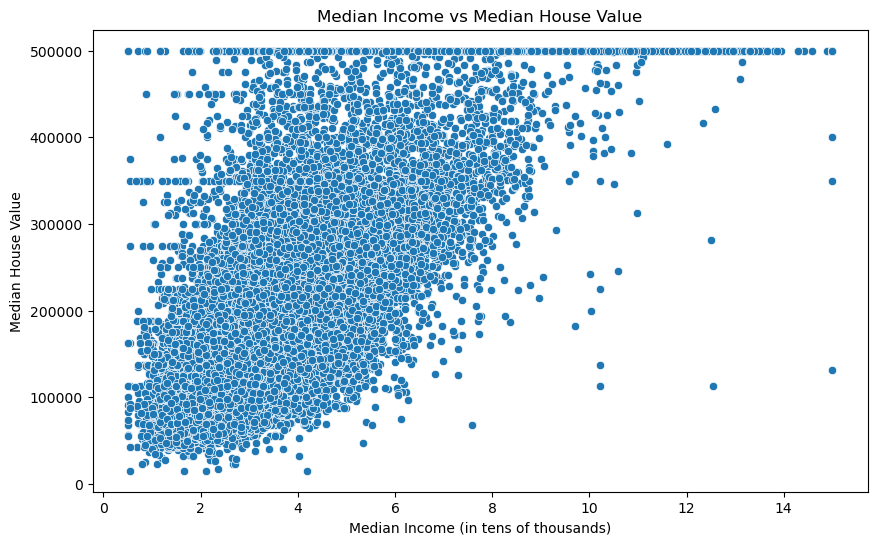

In [65]:
# Scatter plot of 'median_income' vs 'median_house_value'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('Median House Value')
plt.show()


In [66]:
# Group the entire dataset by 'median_income' and count the number of occurrences for each median_income category

median_income_class_counts = housing_data.groupby(['median_income', 'median_house_value_class']).size().reset_index(name='median_income_class_count')
median_income_class_counts.head()

median_income median_house_value_class  median_income_class_count
0         0.4999               Affordable                          2
1         0.4999                    Cheap                          8
2         0.4999                   Luxury                          2
3         0.5360               Affordable                          2
4         0.5360                    Cheap                          5

In [67]:
# Group by 'median_income' and count the occurrences of each category

median_income_total_counts = housing_data.groupby('median_income').size().reset_index(name='median_income_grp')

# Display the resulting DataFrame
median_income_total_counts.head()

median_income  median_income_grp
0         0.4999                 12
1         0.5360                 10
2         0.5495                  1
3         0.6433                  1
4         0.6775                  1

In [68]:
# Visualize the relationship between median_income and the count of 'median house value class' using a bar chart in altair

# Sample 5000 rows from the dataset
sampled_data3 = median_income_class_counts.sample(n=5000, random_state=42)


alt.Chart(sampled_data3).mark_bar().encode(x='median_income', y='median_house_value_class').properties(title='Count of Median_Income by House Class Type')


alt.Chart(...)

In [69]:
# Group the entire dataset by 'median_income' and count the number of occurrences for each income
median_incomeTot = housing_data.groupby('median_income')['median_house_value_class'].agg(median_incomeTot= 'count').reset_index()

# Display the first few rows of the grouped data
median_incomeTot.head()

median_income  median_incomeTot
0         0.4999                12
1         0.5360                10
2         0.5495                 1
3         0.6433                 1
4         0.6775                 1

In [70]:
# Group the data by both 'median_income' and 'median_house_value' to get counts for each class
median_incomeProp = housing_data.groupby(['median_income', 'median_house_value_class'])['median_house_value_class'].agg(median_incomeCat='count').reset_index()

# Display the first few rows of the grouped data
median_incomeProp.head()

median_income median_house_value_class  median_incomeCat
0         0.4999               Affordable                 2
1         0.4999                    Cheap                 8
2         0.4999                   Luxury                 2
3         0.5360               Affordable                 2
4         0.5360                    Cheap                 5

In [71]:
# Merge median_incomeTot and median_incomeProp  to combine total counts and class counts
median_incomeComb = pd.merge(median_incomeProp, median_incomeTot, left_on=['median_income'], right_on=['median_income'])

# Calculate the proportion of each class within each median_income group
median_incomeComb['catProp'] = (median_incomeComb.median_incomeCat / median_incomeComb.median_incomeTot) * 100

# Display the first few rows of the combined data
median_incomeComb.head()

median_income median_house_value_class  median_incomeCat  median_incomeTot  \
0         0.4999               Affordable                 2                12   
1         0.4999                    Cheap                 8                12   
2         0.4999                   Luxury                 2                12   
3         0.5360               Affordable                 2                10   
4         0.5360                    Cheap                 5                10   

     catProp  
0  16.666667  
1  66.666667  
2  16.666667  
3  20.000000  
4  50.000000

In [72]:
 # Segment Analysis
# Create bins for median_income and analyze house prices within these segments.
# Aggregate median_income to reduce the number of rows
# Why ? The number of rows in our dataset is greater than the maximum allowed (5000) for this visualization.

housing_data['median_income_bins'] = pd.cut(housing_data['median_income'], bins=10)
housing_data['median_income_bins'] = housing_data['median_income_bins'].astype(str)

# Group the data by 'median_income_bins' and 'median_house_value_class'
median_income_class_counts_agg = housing_data.groupby(['median_income_bins', 'median_house_value_class']).size().reset_index(name='median_income_class_count')
median_income_total_counts_agg = housing_data.groupby('median_income_bins').size().reset_index(name='median_income_grp')

# Merge the two DataFrames on 'median_income_bins'
median_income_data_agg = pd.merge(median_income_class_counts_agg, median_income_total_counts_agg, on='median_income_bins')

# Calculate the proportion of each 'median_house_value_class' within each 'median_income_bins' category
median_income_data_agg['catProp'] = (median_income_data_agg['median_income_class_count'] /median_income_data_agg['median_income_grp']) * 100

# Display the first few rows of the aggregated data
median_income_data_agg.head()

median_income_bins median_house_value_class  median_income_class_count  \
0      (0.485, 1.95]               Affordable                        404   
1      (0.485, 1.95]                    Cheap                       1588   
2      (0.485, 1.95]                Expensive                         80   
3      (0.485, 1.95]                   Luxury                         13   
4      (0.485, 1.95]                 Moderate                        162   

   median_income_grp    catProp  
0               2247  17.979528  
1               2247  70.672007  
2               2247   3.560303  
3               2247   0.578549  
4               2247   7.209613

In [73]:
# Create a bar chart to show the distribution of median house value classes within each median_income category
median_income_chart_agg = alt.Chart(median_income_data_agg).mark_bar().encode(
    x=alt.X('median_income_bins:N', title='Median Income Bins'),
    y=alt.Y('catProp', title='Proportion (%)'),
    color=alt.Color('median_house_value_class:N', title='House Value Class'),
    tooltip=['median_income_bins', 'median_house_value_class', 'catProp']
).facet(
    column='median_house_value_class:N'
).properties(
    title='Proportion of Median House Value Class by Median Income'
).resolve_scale(
    y='independent'
)

# Display the chart
median_income_chart_agg

alt.FacetChart(...)

In [74]:
# 👆🏽 Intuitions from the EDA
# A correlation coefficient of approximately 0.69 indicates a moderate to strong positive correlation between
# median_income and median_house_value. This suggests that higher median income is generally associated with 
# higher house prices, supporting our hypothesis.

## 4th Business Problem & Hypothesis: 

In [75]:
# 4th Business Problem & Hypothesis: 
# Does the age of houses impact their market value?
# Older houses have lower market value compared to newer houses.

In [76]:
# Display the first 5 rows of the 'housing_median_age', 'median_house_value', and 'median_house_value_class' columns in the housing_data DataFrame
# This helps to quickly inspect the data and verify the values in these specific columns

housing_data[['housing_median_age', 'median_house_value', 'median_house_value_class']].head()

housing_median_age  median_house_value median_house_value_class
0                41.0            452600.0                Expensive
1                21.0            358500.0                Expensive
2                52.0            352100.0                Expensive
3                52.0            341300.0                Expensive
4                52.0            342200.0                Expensive

In [77]:
 # Display summary statistics for housing median age and median house value
housing_data[['housing_median_age', 'median_house_value']].describe()

housing_median_age  median_house_value
count        20640.000000        20640.000000
mean            28.639486       206855.816909
std             12.585558       115395.615874
min              1.000000        14999.000000
25%             18.000000       119600.000000
50%             29.000000       179700.000000
75%             37.000000       264725.000000
max             52.000000       500001.000000

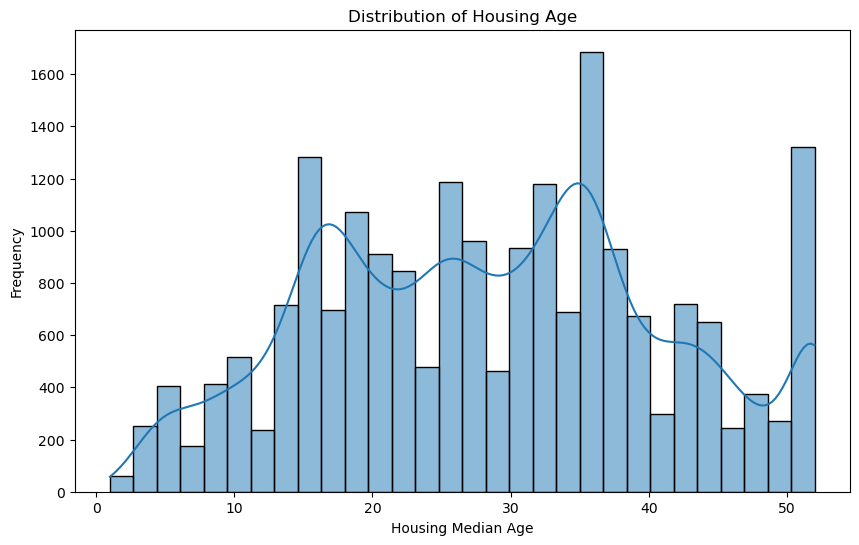

In [78]:
# Plot distribution of 'housing median age' for a clearer view 
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['housing_median_age'], bins=30, kde=True)
plt.title('Distribution of Housing Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

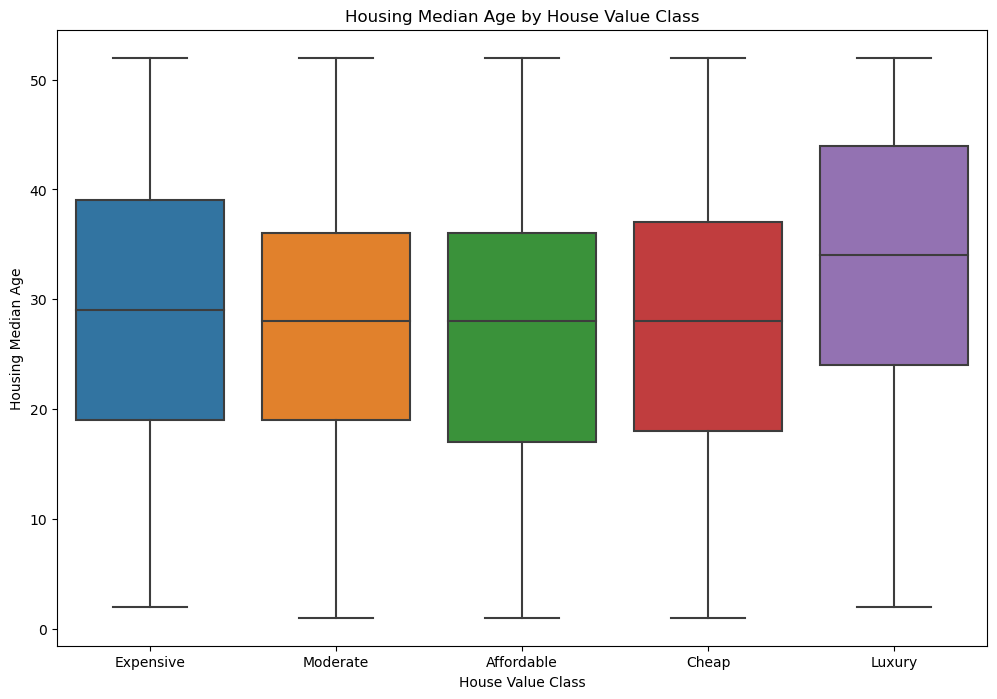

In [79]:
# Visualize the relationships between housing_median_age and median_house_value

# Box plot of 'housing_median_age' vs 'median_house_value_class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='median_house_value_class', y='housing_median_age', data=housing_data)
plt.title('Housing Median Age by House Value Class')
plt.xlabel('House Value Class')
plt.ylabel('Housing Median Age')
plt.show()


In [80]:
# Calculate correlation
correlation_age_price = housing_data['housing_median_age'].corr(housing_data['median_house_value'])
print(f"Correlation coefficient between housing_median_age and median_house_value: {correlation_age_price}")


Correlation coefficient between housing_median_age and median_house_value: 0.10562341249321


In [81]:
# Group the entire dataset by 'housing_median_age' and count the number of occurrences for each housing_median_age category

housing_median_age_class_counts = housing_data.groupby(['housing_median_age', 'median_house_value_class']).size().reset_index(name='housing_median_age_class_count')
housing_median_age_class_counts.head()

housing_median_age median_house_value_class  housing_median_age_class_count
0                 1.0               Affordable                               1
1                 1.0                    Cheap                               1
2                 1.0                 Moderate                               2
3                 2.0               Affordable                              18
4                 2.0                    Cheap                               7

In [82]:
# Group by 'housing_median_age' and count the occurrences of each category

housing_median_age_total_counts = housing_data.groupby('housing_median_age').size().reset_index(name='housing_median_age_grp')

# Display the resulting DataFrame
housing_median_age_total_counts.head()

housing_median_age  housing_median_age_grp
0                 1.0                       4
1                 2.0                      58
2                 3.0                      62
3                 4.0                     191
4                 5.0                     244

In [83]:
# Visualize the relationship between housing_median_age and the count of 'housing age group' using a bar chart in altair

alt.Chart(housing_median_age_total_counts).mark_bar().encode(x='housing_median_age', y='housing_median_age_grp').properties(title='Count of Housing Median Age by Age Group')


alt.Chart(...)

In [84]:
# Group the entire dataset by 'housing_median_age' and count the number of occurrences for each age
housing_median_ageTot = housing_data.groupby('housing_median_age')['median_house_value_class'].agg(housing_median_ageTot= 'count').reset_index()

# Display the first few rows of the grouped data
housing_median_ageTot.head()

housing_median_age  housing_median_ageTot
0                 1.0                      4
1                 2.0                     58
2                 3.0                     62
3                 4.0                    191
4                 5.0                    244

In [85]:
# Group the data by both 'housing_median_age' and 'median_house_value' to get counts for each class
housing_median_ageProp = housing_data.groupby(['housing_median_age', 'median_house_value_class'])['median_house_value_class'].agg(housing_median_ageCat='count').reset_index()

# Display the first few rows of the grouped data
housing_median_ageProp.head()

housing_median_age median_house_value_class  housing_median_ageCat
0                 1.0               Affordable                      1
1                 1.0                    Cheap                      1
2                 1.0                 Moderate                      2
3                 2.0               Affordable                     18
4                 2.0                    Cheap                      7

In [86]:
# Merge housing_median_ageTot and housing_median_ageProp  to combine total counts and class counts
housing_median_ageComb = pd.merge(housing_median_ageProp, housing_median_ageTot, left_on=['housing_median_age'], right_on=['housing_median_age'])

# Calculate the proportion of each class within each housing_median_age group
housing_median_ageComb['catProp'] = (housing_median_ageComb.housing_median_ageCat / housing_median_ageComb.housing_median_ageTot) * 100

# Display the first few rows of the combined data
housing_median_ageComb.head()

housing_median_age median_house_value_class  housing_median_ageCat  \
0                 1.0               Affordable                      1   
1                 1.0                    Cheap                      1   
2                 1.0                 Moderate                      2   
3                 2.0               Affordable                     18   
4                 2.0                    Cheap                      7   

   housing_median_ageTot    catProp  
0                      4  25.000000  
1                      4  25.000000  
2                      4  50.000000  
3                     58  31.034483  
4                     58  12.068966

In [87]:
# Visualize the relationship using Altair, with facets for median_house_value_class
alt.Chart(housing_median_ageComb).mark_bar().encode(x='housing_median_age', y='catProp').facet(column='median_house_value_class').properties(
    title='Proportion of House Value Class by Income Level')

alt.FacetChart(...)

In [88]:
# 👆🏽 Intuitions from the EDA
# The correlation coefficient between housing_median_age and median_house_value is 0.1056, indicating a very weak
# positive linear relationship between the age of houses and their market value. This weak positive correlation suggests
# that older houses might have slightly higher market values, contrary to our hypothesis. However, the correlation is very
# close to zero, implying that age might not be a significant factor in determining house prices in California.

## A look into our 5th Business Problem & Hypothesis: 

In [89]:
# 5th Business Problem & Hypothesis: 
# How do population and household characteristics (total rooms, total bedrooms, households) affect house prices?
# Areas with higher population density have lower house prices due to increased demand and limited supply.

In [90]:
# Calculate population density
housing_data['population_density'] = housing_data['population'] / housing_data['households']
housing_data['population_density'].head()

0    2.555556
1    2.109842
2    2.802260
3    2.547945
4    2.181467
Name: population_density, dtype: float64

In [91]:
# Calculate correlation between population density and median house value
population_density_correlation = housing_data['population_density'].corr(housing_data['median_house_value'])

population_density_correlation 

-0.023737412956134362

In [92]:
# Calculate correlations for other characteristics

population_density_correlation = housing_data['population_density'].corr(housing_data['median_house_value'])
total_rooms_correlation = housing_data['total_rooms'].corr(housing_data['median_house_value'])
total_bedrooms_correlation = housing_data['total_bedrooms'].corr(housing_data['median_house_value'])
households_correlation = housing_data['households'].corr(housing_data['median_house_value'])

print("Correlation between population density and house prices:", population_density_correlation)
print("Correlation between total rooms and house prices:", total_rooms_correlation)
print("Correlation between total bedrooms and house prices:", total_bedrooms_correlation)
print("Correlation between households and house prices:", households_correlation)

Correlation between population density and house prices: -0.023737412956134362
Correlation between total rooms and house prices: 0.134153113806563
Correlation between total bedrooms and house prices: 0.049456861920854585
Correlation between households and house prices: 0.06584265057005645


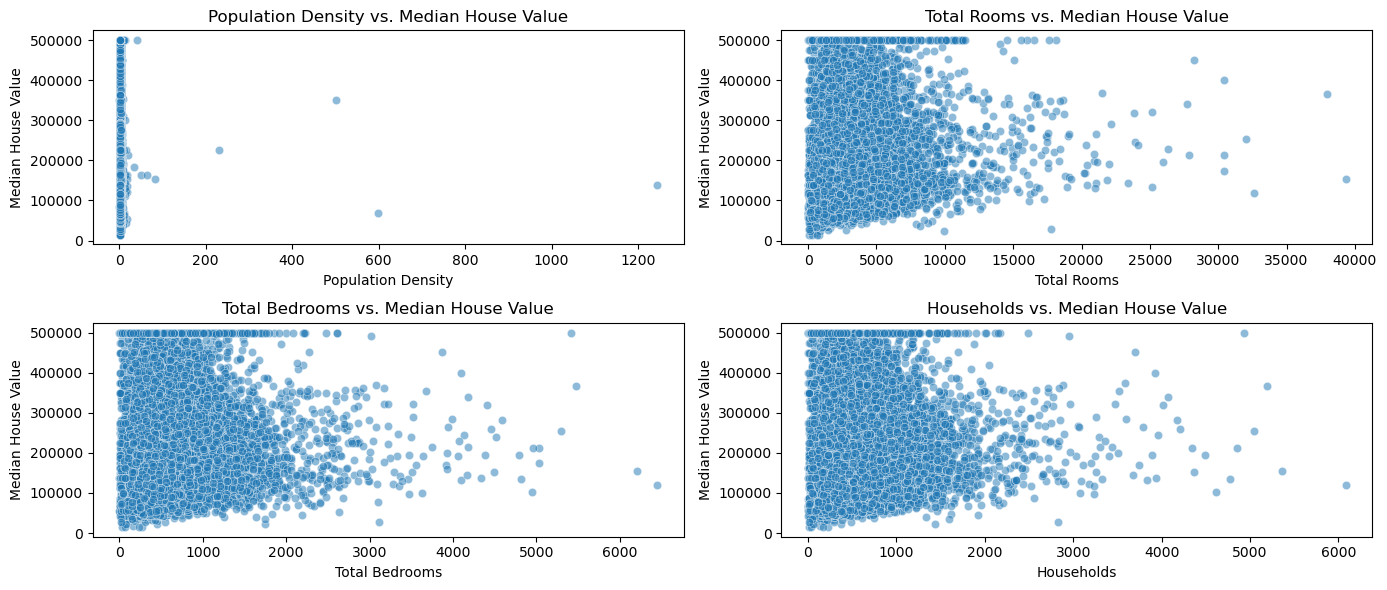

In [93]:
#  Visualize Relationships
plt.figure(figsize=(14, 6))

# Scatter plot for population density vs. house prices
plt.subplot(2, 2, 1)
sns.scatterplot(x='population_density', y='median_house_value', data=housing_data, alpha=0.5)
plt.title('Population Density vs. Median House Value')
plt.xlabel('Population Density')
plt.ylabel('Median House Value')

# Scatter plot for total rooms vs. house prices
plt.subplot(2, 2, 2)
sns.scatterplot(x='total_rooms', y='median_house_value', data=housing_data, alpha=0.5)
plt.title('Total Rooms vs. Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')

# Scatter plot for total bedrooms vs. house prices
plt.subplot(2, 2, 3)
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=housing_data, alpha=0.5)
plt.title('Total Bedrooms vs. Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')

# Scatter plot for households vs. house prices
plt.subplot(2, 2, 4)
sns.scatterplot(x='households', y='median_house_value', data=housing_data, alpha=0.5)
plt.title('Households vs. Median House Value')
plt.xlabel('Households')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()


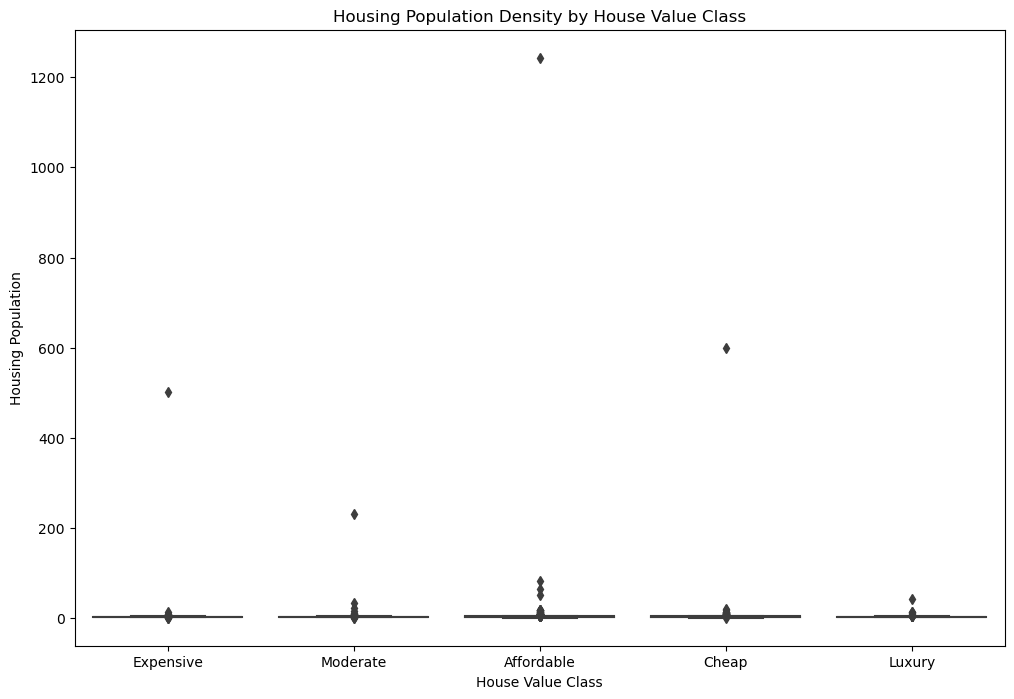

In [94]:
# Visualize the relationships between population density and median_house_value

# Box plot of 'population density' vs 'median_house_value_class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='median_house_value_class', y='population_density', data=housing_data)
plt.title('Housing Population Density by House Value Class')
plt.xlabel('House Value Class')
plt.ylabel('Housing Population')
plt.show()


In [95]:
 # Display summary statistics for population density and median house value
housing_data[['population_density', 'median_house_value']].describe()

population_density  median_house_value
count        20640.000000        20640.000000
mean             3.070655       206855.816909
std             10.386050       115395.615874
min              0.692308        14999.000000
25%              2.429741       119600.000000
50%              2.818116       179700.000000
75%              3.282261       264725.000000
max           1243.333333       500001.000000

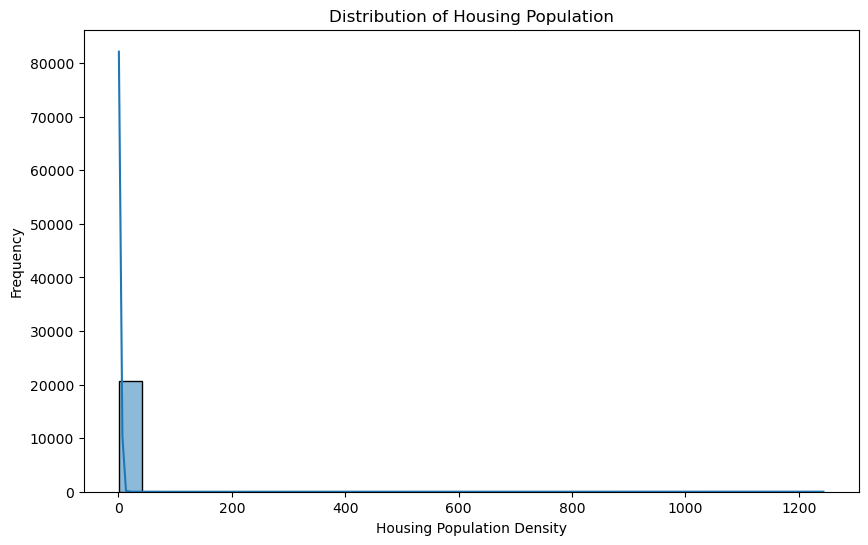

In [96]:
# Plot distribution of 'population density' for a clearer view 
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['population_density'], bins=30, kde=True)
plt.title('Distribution of Housing Population')
plt.xlabel('Housing Population Density')
plt.ylabel('Frequency')
plt.show()

In [97]:
# Group the entire dataset by 'population_density' and count the total number of occurrences for each population density


population_density_class_counts = housing_data.groupby(['population_density', 'median_house_value_class']).size().reset_index(name='population_density_class_count')

# Display the first 10 rows of the grouped data

population_density_class_counts.head()


population_density median_house_value_class  population_density_class_count
0            0.692308                    Cheap                               1
1            0.750000                Expensive                               1
2            0.970588                 Moderate                               1
3            1.060606               Affordable                               1
4            1.066176                Expensive                               1

In [98]:
# Group by 'population_density' and count the occurrences of each category

population_density_total_counts = housing_data.groupby('population_density').size().reset_index(name='population_density_grp')

# Display the resulting DataFrame
population_density_total_counts.head()

population_density  population_density_grp
0            0.692308                       1
1            0.750000                       1
2            0.970588                       1
3            1.060606                       1
4            1.066176                       1

In [99]:
# Visualize the relationship between population density and the count of 'median house value class' using a bar chart in altair

# Sample 5000 rows from the dataset
sampled_data4 = population_density_class_counts.sample(n=5000, random_state=42)

alt.Chart(sampled_data4).mark_bar().encode(x='population_density', y='median_house_value_class').properties(title='Count of Population Density by House Class')
# Visualize the relationship between median_income and 



alt.Chart(...)

In [100]:
# Group the entire dataset by 'population density' and count the number of occurrences for each age
population_densityTot = housing_data.groupby('population_density')['median_house_value_class'].agg(population_densityTot= 'count').reset_index()

# Display the first few rows of the grouped data
population_densityTot.head()

population_density  population_densityTot
0            0.692308                      1
1            0.750000                      1
2            0.970588                      1
3            1.060606                      1
4            1.066176                      1

In [101]:
# Group the data by both 'population_density' and 'median_house_value' to get counts for each class
population_densityProp = housing_data.groupby(['population_density', 'median_house_value_class'])['median_house_value_class'].agg(population_densityCat='count').reset_index()

# Display the first few rows of the grouped data
population_densityProp.head()

population_density median_house_value_class  population_densityCat
0            0.692308                    Cheap                      1
1            0.750000                Expensive                      1
2            0.970588                 Moderate                      1
3            1.060606               Affordable                      1
4            1.066176                Expensive                      1

In [102]:
# Merge population_densityTot and population_densityProp  to combine total counts and class counts
population_densityComb = pd.merge(population_densityProp, population_densityTot, left_on=['population_density'], right_on=['population_density'])

# Calculate the proportion of each class within each population_density group
population_densityComb['catProp'] = (population_densityComb.population_densityCat / population_densityComb.population_densityTot) * 100

# Display the first few rows of the combined data
population_densityComb.head()

population_density median_house_value_class  population_densityCat  \
0            0.692308                    Cheap                      1   
1            0.750000                Expensive                      1   
2            0.970588                 Moderate                      1   
3            1.060606               Affordable                      1   
4            1.066176                Expensive                      1   

   population_densityTot  catProp  
0                      1    100.0  
1                      1    100.0  
2                      1    100.0  
3                      1    100.0  
4                      1    100.0

In [103]:
# Aggregate total_bedrooms to reduce the number of rows
# Why ? The number of rows in our dataset is greater than the maximum allowed (5000) for this visualization.

# Aggregate population density to reduce the number of rows
housing_data['population_density_bins'] = pd.cut(housing_data['population_density'], bins=10)
housing_data['population_density_bins'] = housing_data['population_density_bins'].astype(str)

# Group the data by 'population_density_bins' and 'median_house_value_class'
population_density_counts_agg = housing_data.groupby(['population_density_bins', 'median_house_value_class']).size().reset_index(name='population_density_count')
population_density_total_counts_agg = housing_data.groupby('population_density_bins').size().reset_index(name='population_density_grp')

# Merge the two DataFrames on 'income_bins'
population_density_data_agg = pd.merge(population_density_counts_agg, population_density_total_counts_agg, on='population_density_bins')

# Calculate the proportion of each 'median_house_value_class' within each 'income_bins' category
population_density_data_agg['catProp'] = (population_density_data_agg['population_density_count'] /population_density_data_agg['population_density_grp']) * 100

# Display the first few rows of the aggregated data
population_density_data_agg.head()

population_density_bins median_house_value_class  population_density_count  \
0        (-0.55, 124.956]               Affordable                      5158   
1        (-0.55, 124.956]                    Cheap                      5155   
2        (-0.55, 124.956]                Expensive                      4194   
3        (-0.55, 124.956]                   Luxury                       965   
4        (-0.55, 124.956]                 Moderate                      5164   

   population_density_grp    catProp  
0                   20636  24.995154  
1                   20636  24.980616  
2                   20636  20.323706  
3                   20636   4.676294  
4                   20636  25.024230

In [104]:
# Create a bar chart to show the distribution of median house value classes within each population density category
population_chart_agg = alt.Chart(population_density_data_agg).mark_bar().encode(
    x=alt.X('population_density_bins:N', title='Population Density Bins'),
    y=alt.Y('catProp', title='Proportion (%)'),
    color=alt.Color('median_house_value_class:N', title='House Value Class'),
    tooltip=['population_density_bins', 'median_house_value_class', 'catProp']
).facet(
    column='median_house_value_class:N'
).properties(
    title='Proportion of Median House Value Class by Population Density'
).resolve_scale(
    y='independent'
)

# Display the chart
population_chart_agg

alt.FacetChart(...)

In [105]:
# 👆🏽 Intuitions from the EDA

# Population Density and House Prices: Near-zero negative correlation (-0.024) suggests that there is almost no linear 
# relationship between population density and house prices. This means that, according to our data, changes in population 
# density do not strongly correlate with changes in house prices.
# Households and House Prices: A weak positive correlation (0.066) indicates that the number of households has a minimal
# effect on house prices. It suggests that, similar to total bedrooms, the number of households is not a strong predictor 
# of house prices.
# Though from our visualization, we can see that houses with smaller population density have more of the luxury class median 
# housing while houses with the highest range of population density have more of the cheap class median housing. 

### Task 2.3: Identify and handle outliers in the dataset.

In [106]:
# Handling outliers in a dataset is crucial for ensuring accurate analysis and model performance.Outliers can skew 
# statistical measures and affect the performance of machine learning models by introducing noise and bias. Here is how I
# identified and will handle outliers in the dataset:
#Identifying Outliers: Visual Inspection: From the box and scatter plots we plotted during our exploratory analysis, 
# we can visually identify outliers. We can see the points in our box plots that fall outside the whiskers (1.5 times the 
# interquartile range above the third quartile or below the first quartile), these are considered outliers.
# Handling Outliers: Contextual Understanding: It's very important that we evaluate outliers individually to determine if 
# they should be retained or treated differently based on domain knowledge. Handling outliers requires careful consideration
# of the dataset's characteristics and the specific goals of the analysis. For this dataset, I won't be getting rid of the 
# outliers because they are important to our analysis.

## Phase 3: Feature Engineering

In [107]:
# Task 3.1: Create new features that may help improve the model's performance.
# Task 3.2: Encode categorical variables using one-hot or label encoding techniques.
# Task 3.3: Normalize or standardize numerical features as needed.


In [108]:
# Feature Engineering
# In this phase, we'll create new features, encode categorical variables, and standardize numerical features 
# to enhance the predictive power of our model.

In [109]:
# Creating New Features
# New features can help capture additional information and improve model performance. For this dataset, 
# we can create features such as:
# Rooms per Household: Total rooms divided by households.
# Bedrooms per Room: Total bedrooms divided by total rooms.
# Population per Household: Population divided by households which is the same with the population density we created earlier
# We also created the median_class_value_class which helped us in our EDA 

In [110]:
# Create new features
housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
housing_data['bedrooms_per_room'] = housing_data['total_bedrooms'] / housing_data['total_rooms']


# Display the first few rows of the DataFrame to verify the new features
housing_data[['rooms_per_household', 'bedrooms_per_room']].head()


rooms_per_household  bedrooms_per_room
0             6.984127           0.146591
1             6.238137           0.155797
2             8.288136           0.129516
3             5.817352           0.184458
4             6.281853           0.172096

In [111]:
# view our updated dataset with the new columns 
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  median_house_value_class   total_rooms_bins total_bedrooms_bins  \
0                Expensive  (-37.318, 3933.8]     (-5.444, 645.4]   
1                Expensive   (3933.8, 7865.6]     (645.4, 1289.8]   
2                Expensive  (-37.318, 3933.8]     (-5.444, 645.4]   
3                Expensive  (-37.318, 3933.8]     (-5.444, 645.4]   
4                Expensive  (-37.318, 3933.8]     (-5.444, 645.4]   

  median_income_bins  population_density population_density_bins  \
0        (7.75, 9.2]            2.555556        (-0.55, 124.956]   
1        (7.75, 9.2]            2.109842        (-0.55, 124.956]   
2        (6.3, 7.75]            2.802260        (-0.55, 124.956]   
3        (4.85, 6.3]            2.547945        (-0.55, 124.956]   
4        (3.4, 4.85]            2.181467        (-0.55, 124.956]   

   rooms_per_household  bedrooms_per_room  
0             6.984127           0.146591  
1             6.238137           0.155797  
2             8.288136           0.129516  
3             5.817352           0.184458  
4             6.281853           0.172096

In [112]:
# Display the Updated DataFrame info to understand the structure, non-null counts, and data types.

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  median_house_value_class  20640 non-null  object 
 11  total_rooms_bins          20640 non-null  object 
 12  total_bedrooms_bins       20640 non-null  object 
 13  median_income_bins        20640 non-null  object 
 14  popula

In [113]:
# Calculate correlations for the new features

rooms_per_household_correlation = housing_data['rooms_per_household'].corr(housing_data['median_house_value'])
bedrooms_per_room_correlation = housing_data['bedrooms_per_room'].corr(housing_data['median_house_value'])

print("Correlation between rooms_per_household and house prices:", rooms_per_household_correlation)
print("Correlation between bedrooms_per_room and house prices:", bedrooms_per_room_correlation)


Correlation between rooms_per_household and house prices: 0.15194828974145783
Correlation between bedrooms_per_room and house prices: -0.23330292651593845


In [114]:
#  Correlation between rooms_per_household and house prices: 0.15194828974145783

# Interpretation:
# The correlation coefficient between rooms_per_household and median_house_value is 0.1519.
# This value indicates a positive correlation, though a weak one.
# Positive correlation means that as the number of rooms per household increases, the median house price tends to 
# increase as well. However, since the correlation is weak, the relationship is not very strong.

# Implications:
# Houses with more rooms per household are slightly more expensive on average.
# This could be due to larger houses generally being perceived as more valuable and therefore commanding higher prices.

# Correlation between bedrooms_per_room and house prices: -0.23330292651593845

# Interpretation:
# The correlation coefficient between bedrooms_per_room and median_house_value is -0.2333.
# This value indicates a negative correlation, which is stronger than the positive correlation of rooms_per_household.
# Negative correlation means that as the proportion of bedrooms to total rooms increases, the median house price tends to 
# decrease.

# Implications:
# Houses with a higher proportion of bedrooms relative to total rooms tend to have lower prices.
# This could be because a higher bedrooms-to-rooms ratio might indicate a smaller or less spacious house overall, which 
# could be less desirable and thus lower in price.
# For example, a house with many small bedrooms but fewer common living spaces might be less attractive to buyers looking 
# for larger, more open living areas.

#Summary

# Rooms per Household (0.1519): There's a weak positive correlation suggesting that more rooms per household can slightly
# increase house prices. Larger houses with more rooms are generally more expensive.
# Bedrooms per Room (-0.2333): There's a moderate negative correlation indicating that a higher proportion of bedrooms to
# total rooms is associated with lower house prices. This could be because such houses are perceived as having less spacious
# or desirable layouts.

# Understanding these correlations can help in making informed decisions about what features might add value to properties 
# and how different characteristics of houses in California impact their market value.

In [115]:
# Before we encode the categorical variables, let's drop the bins columns.
# Reasons:

# 1. Redundancy with Original Columns: The bins columns are derived from original numerical columns.
# Since the original columns will be part of our analysis, the bins columns might be redundant.

# 2.Loss of Granular Information: Binning involves converting continuous variables into categorical ones, 
# which can lead to loss of detailed information. Models might perform better with the more granular, continuous data.

# 3. Model Performance: Including both binned and original columns can introduce multicollinearity, where highly correlated 
# features provide redundant information, potentially degrading model performance.

# 4. Simplicity: Simplifying our dataset by removing derived features (bins) can make the dataset easier to manage and
# understand. This can also reduce the risk of overfitting by limiting the number of features.

# 5. Focus on Raw Features: Raw numerical features often provide more predictive power and flexibility for modeling, 
# especially for algorithms that can capture non-linear relationships without the need for binning.

# 6. Preprocessing Consistency: If other features have not been binned, maintaining consistency in preprocessing can be 
# beneficial. Having a mix of binned and unbinned features might complicate the preprocessing pipeline.

# Summary: While binned features can sometimes improve model performance by simplifying relationships, in this case, 
# the raw features likely offer more detailed and useful information for the model. Given that we will standardize the 
# numerical features and encode the categorical ones, focusing on the processed raw features might be more beneficial. 

# We will also drop the median_house_value_class column
# why ?

# Given that median_house_value is our target, it’s better not to include median_house_value_class as a feature in our 
# model. Instead, we will focus on features that are independent of the target variable to train the model effectively 
# and avoid data leakage. This will ensure that our model's predictions are based on genuine relationships between the 
# features and the target, leading to better generalization on unseen data.


In [116]:
# drop the class & bin columns
# List of columns to drop
bin_columns = ['total_rooms_bins', 'total_bedrooms_bins', 'median_income_bins', 
               'population_density_bins', 'median_house_value_class']

# Drop the bin columns
housing_data = housing_data.drop(columns=bin_columns)

# Verify the columns are dropped
print("Columns after dropping bins:", housing_data.columns)


Columns after dropping bins: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'population_density',
       'rooms_per_household', 'bedrooms_per_room'],
      dtype='object')


In [117]:
# Task 3.2: Encode Categorical Variable
# For the ocean_proximity column, we will use one-hot encoding.
# One-hot encoding is a method used to convert categorical variables into a numerical format that can be provided to 
# machine learning algorithms to do a better job in prediction. For each unique category in the categorical variable, 
# one-hot encoding creates a new binary column (0 or 1). 

housing_data_encoded = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)


# pd.get_dummies(): This function creates a new dataframe with binary columns for each category in the ocean_proximity column.
# columns=['ocean_proximity']: Specifies which columns to encode.
# drop_first=True: This argument drops the first category to avoid multicollinearity. This is optional but often used in regression analysis to prevent redundancy.

# Display the first few rows of the DataFrame to verify the encoding
housing_data_encoded.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   population_density  rooms_per_household  bedrooms_per_room  \
0            2.555556             6.984127           0.146591   
1            2.109842             6.238137           0.155797   
2            2.802260             8.288136           0.129516   
3            2.547945             5.817352           0.184458   
4            2.181467             6.281853           0.172096   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [118]:
# Task 3.3: Normalize or Standardize Numerical Features
# Best Practice:
# Standardize the Features, Not the Target: It is common practice to standardize or normalize the features (independent 
# variables) to ensure that all features contribute equally to the model's performance. However, leave the target variable 
# (median_house_value) on its original scale.

# Normalizing or standardizing features can help the model converge faster and perform better. We'll use standardization
# (subtracting the mean and dividing by the standard deviation) for this dataset.

from sklearn.preprocessing import StandardScaler

# List of numerical columns before encoding
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                     'population', 'households', 'median_income', 'population_density', 
                     'rooms_per_household', 'bedrooms_per_room']

# List of all new one-hot encoded columns
encoded_column = [col for col in housing_data_encoded.columns if col.startswith('ocean_proximity_')]

# Combine numerical and one-hot encoded columns
all_columns_to_scale = numerical_columns + encoded_column

# Apply StandardScaler
scaler = StandardScaler()
housing_data_encoded[all_columns_to_scale] = scaler.fit_transform(housing_data_encoded[all_columns_to_scale])

# Display the first few rows of the scaled data
housing_data_encoded.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  median_house_value  \
0   -0.974429   -0.977033       2.344766            452600.0   
1    0.861439    1.669961       2.332238            358500.0   
2   -0.820777   -0.843637       1.782699            352100.0   
3   -0.766028   -0.733781       0.932968            341300.0   
4   -0.759847   -0.629157      -0.012881            342200.0   

   population_density  rooms_per_household  bedrooms_per_room  \
0           -0.049597             0.628559          -1.029988   
1           -0.092512             0.327041          -0.888897   
2           -0.025843             1.155620          -1.291686   
3           -0.050329             0.156966          -0.449613   
4           -0.085616             0.344711          -0.639087   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0               -0.681889               -0.015566                  2.830742   
1               -0.681889               -0.015566                  2.830742   
2               -0.681889               -0.015566                  2.830742   
3               -0.681889               -0.015566                  2.830742   
4               -0.681889               -0.015566                  2.830742   

   ocean_proximity_NEAR OCEAN  
0                   -0.384466  
1                   -0.384466  
2                   -0.384466  
3                   -0.384466  
4                   -0.384466

In [119]:
# Display summary statistics to get an overview of the numerical features
housing_data_encoded.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  2.064000e+04  2.064000e+04        2.064000e+04  2.064000e+04   
mean  -8.556119e-15 -1.046536e-15        3.786807e-17  2.573308e-17   
std    1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   
min   -2.385992e+00 -1.447568e+00       -2.196180e+00 -1.207283e+00   
25%   -1.113209e+00 -7.967887e-01       -8.453931e-01 -5.445698e-01   
50%    5.389137e-01 -6.422871e-01        2.864572e-02 -2.332104e-01   
75%    7.784964e-01  9.729566e-01        6.643103e-01  2.348028e-01   
max    2.625280e+00  2.958068e+00        1.856182e+00  1.681558e+01   

       total_bedrooms    population    households  median_income  \
count    2.064000e+04  2.064000e+04  2.064000e+04   2.064000e+04   
mean    -9.191614e-17 -1.101617e-17  7.435912e-17   5.645785e-17   
std      1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   
min     -1.277688e+00 -1.256123e+00 -1.303984e+00  -1.774299e+00   
25%     -5.718868e-01 -5.638089e-01 -5.742294e-01  -6.881186e-01   
50%     -2.428309e-01 -2.291318e-01 -2.368162e-01  -1.767951e-01   
75%      2.537334e-01  2.644949e-01  2.758427e-01   4.593063e-01   
max      1.408779e+01  3.025033e+01  1.460152e+01   5.858286e+00   

       median_house_value  population_density  rooms_per_household  \
count        20640.000000        2.064000e+04         2.064000e+04   
mean        206855.816909        3.442552e-18         7.539189e-17   
std         115395.615874        1.000024e+00         1.000024e+00   
min          14999.000000       -2.290000e-01        -1.852319e+00   
25%         119600.000000       -6.171062e-02        -3.994496e-01   
50%         179700.000000       -2.431585e-02        -8.078489e-02   
75%         264725.000000        2.037453e-02         2.519615e-01   
max         500001.000000        1.194191e+02         5.516324e+01   

       bedrooms_per_room  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
count       2.064000e+04            2.064000e+04            2.064000e+04   
mean        1.542263e-16           -1.377021e-17           -3.442552e-18   
std         1.000024e+00            1.000024e+00            1.000024e+00   
min        -2.707317e+00           -6.818890e-01           -1.556621e-02   
25%        -5.911329e-01           -6.818890e-01           -1.556621e-02   
50%        -1.629966e-01           -6.818890e-01           -1.556621e-02   
75%         4.035794e-01            1.466514e+00           -1.556621e-02   
max         4.001560e+01            1.466514e+00            6.424173e+01   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
count              2.064000e+04                2.064000e+04  
mean               2.203233e-17                9.329316e-17  
std                1.000024e+00                1.000024e+00  
min               -3.532643e-01               -3.844665e-01  
25%               -3.532643e-01               -3.844665e-01  
50%               -3.532643e-01               -3.844665e-01  
75%               -3.532643e-01               -3.844665e-01  
max                2.830742e+00                2.601007e+00

In [120]:
# Display the Updated DataFrame info to understand the structure, non-null counts, and data types.
# You can see one column from ocean_proximity and another from median_house_value_class are dropped
# Note: 
# Dropping the first category during one-hot encoding (using drop_first=True) does not typically affect the accuracy of 
# our model negatively. Instead, it helps to avoid multicollinearity, which can improve the stability and interpretability
# of linear models. dropping the first category helps to avoid multicollinearity without losing any predictive power.

# The dropped category serves as a reference point. The coefficients of the remaining categories are interpreted relative
# to this reference category.

housing_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   population_density          20640 non-null  float64
 10  rooms_per_household         20640 non-null  float64
 11  bedrooms_per_room           20640 non-null  float64
 12  ocean_proximity_INLAND      20640 non-null  float64
 13  ocean_proximity_ISLAND      206

## Phase 4: Model Training and Evaluation

In [121]:
# Task 4.1: Split the dataset into training and testing sets.
# Task 4.2: Choose and justify the selection of machine learning algorithms (e.g., Linear Regression, Decision Tree, Random Forest, Gradient Boosting).
# Task 4.3: Train multiple models and evaluate their performance using appropriate metrics (e.g., RMSE, MAE, R²).
# Task 4.4: Perform hyperparameter tuning to optimize the model's performance.
# Task 4.5: Select and evaluate the best-performing model on the testing set.


In [122]:
# Task 4.1: Split the dataset into training and testing sets.

# we are going to split the data into training and testing data (x and y data)
# we want to train the model on one set of the data and evaluate it on the other set
# Why? we need to have some unseen data that the model have not seen before, to see if it performs well on this data


In [123]:
# Create Test
# Define feature columns and target column

from sklearn.model_selection import train_test_split

X = housing_data_encoded.drop(['median_house_value'], axis=1) 

# X is the dataframe without the target variable,
# since we are dropping a column, we use axis=1

y = housing_data_encoded ['median_house_value']

# y is the target variable


# Split the data into training and testing sets
#train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)
# test_size = 0.2 means 20% of the data will be reserved for testing after we are done 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Verify the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 15)
Testing set shape: (4128, 15)


In [125]:
# Task 4.2: Choose and Justify the Selection of Machine Learning Algorithms
# Task 4.3: Train Multiple Models and Evaluate Their Performance

# In this phase, we need to choose a few machine learning algorithms that we will use for predicting house prices. 
# We will also provide justifications for why these algorithms are suitable for our problem.

# 1. Linear Regression
# Justification:

# Simplicity: Linear regression is straightforward to understand and interpret, making it a good baseline model.
# Efficiency: It is computationally efficient and can handle large datasets effectively.
# Assumptions: It assumes a linear relationship between features and the target, which can be a good starting point for 
# our analysis.

# 2. Decision Tree Regressor
# Justification:

# Non-linear Relationships: Decision trees can capture non-linear relationships between features and the target variable.
# Interpretability: The model is easy to visualize and interpret, which helps in understanding the importance of different 
# features. No Need for Feature Scaling: Decision trees do not require feature scaling, simplifying the preprocessing steps.

# 3. Random Forest Regressor
# Justification:

# Ensemble Method: Random forests combine multiple decision trees to improve performance and reduce overfitting.
# Feature Importance: They provide insights into feature importance, helping us understand which features contribute most 
# to the predictions.
# Robustness: Random forests are robust to noise and can handle large datasets with high dimensionality.

# 4. Gradient Boosting Regressor
# Justification:

# High Accuracy: Gradient boosting often achieves high accuracy by combining the strengths of multiple weak learners 
# (decision trees).
# Flexibility: It can be fine-tuned through hyperparameters to optimize performance.
# Handling Non-linearity: Similar to decision trees and random forests, gradient boosting can capture non-linear relationships
# in the data.

# These algorithms offer a good balance of interpretability, performance, and robustness,making them suitable choices for
# our regression problem. Let's now proceed to train these models and evaluate their performance using appropriate metrics.

In [126]:
# We will train each model and evaluate their performance using metrics such as Root Mean Squared Error (RMSE),
# Mean Absolute Error (MAE), and R² score.

# Linear Regression: Simple and interpretable model, good for baseline comparison.

# import the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [127]:
# Make predictions on the test set

y_pred = reg.predict(X_test)

In [128]:
# Calculate performance metrics

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 69177.42513238022
Mean Absolute Error (MAE): 50256.87445990536
R² Score: 0.6547886919596366


In [129]:
# Decision Tree: Can capture non-linear relationships and interactions between features.

# Import the necessary library
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [130]:
# Make predictions on the test set

y_pred_dt = dt_reg.predict(X_test)

In [131]:
# Calculate performance metrics

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the performance metrics

print(f"Decision Tree Regressor Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R² Score: {r2_dt}")


Decision Tree Regressor Performance:
Root Mean Squared Error (RMSE): 73709.06389638486
Mean Absolute Error (MAE): 46645.176114341084
R² Score: 0.6080794654575394


In [132]:
# Random Forest: An ensemble method that improves the performance and robustness of decision trees.

# import the necessary library
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [133]:
# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)


In [134]:
# Calculate performance metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the performance metrics
print(f"Random Forest Regressor Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R² Score: {r2_rf}")

Random Forest Regressor Performance:
Root Mean Squared Error (RMSE): 50737.77032794036
Mean Absolute Error (MAE): 32778.05459544574
R² Score: 0.8142969725977997


In [135]:
# Gradient Boosting: Another ensemble method that builds trees sequentially to reduce errors.

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train the model
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [136]:
# Make predictions on the test set
y_pred_gb = gb_reg.predict(X_test)

In [137]:
# Calculate performance metrics
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the performance metrics
print(f"Gradient Boosting Regressor Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"R² Score: {r2_gb}")

Gradient Boosting Regressor Performance:
Root Mean Squared Error (RMSE): 53868.31484487342
Mean Absolute Error (MAE): 36916.90099160428
R² Score: 0.790674080814506


## Model Comparison and Selection

In [138]:
# Based on the performance metrics, we can compare the four models to determine which one performs best on our dataset.
# Here are the results summarized:

# Linear Regression:
# RMSE: 69177.43
# MAE: 50256.87
# R² Score: 0.6548
# Interpretation: Linear Regression, being a simple model, shows a moderate fit with an R² score of 0.6548. The relatively 
# high RMSE and MAE indicate that the model has significant prediction errors. This suggests that the linear assumption 
# might not be capturing all the complexities in the data.

# Decision Tree Regressor:
# RMSE: 73709.06
# MAE: 46645.18
# R² Score: 0.6081
# Interpretation: The Decision Tree model performed worse than Linear Regression, with a lower R² score of 0.6081 and higher
# RMSE. This suggests that the model might be overfitting to the training data and not generalizing well to the test data.

# Random Forest Regressor:
# RMSE: 50737.77
# MAE: 32778.05
# R² Score: 0.8143
# Interpretation: The Random Forest model performed the best among all models, with the lowest RMSE and MAE and the highest 
# R² score of 0.8143. This indicates that the ensemble approach of combining multiple decision trees is effectively capturing
# the underlying patterns in the data and generalizing well to unseen data.

# Gradient Boosting Regressor:
# RMSE: 53868.31
# MAE: 36916.90
# R² Score: 0.7907
# Interpretation: Gradient Boosting also performed well, with a slightly lower R² score than Random Forest but still 
# significantly better than Linear Regression and Decision Tree. It shows that sequentially correcting errors with boosting
# improves performance but still lags slightly behind the Random Forest model.


# Model Evaluation

#1. Root Mean Squared Error (RMSE):
 # Best: Random Forest Regressor (50737.77)
 # Worst: Decision Tree Regressor (73709.06)

#2. Mean Absolute Error (MAE):
 # Best: Random Forest Regressor (32778.05)
 # Worst: Linear Regression ( 50256.87)

#3. R² Score:
 # Best: Random Forest Regressor (0.8143)
 # Worst: Decision Tree Regressor (0.6081)

#Conclusion

# Based on the evaluation metrics, the 'Random Forest Regressor' outperforms the other models in all three metrics 
# (RMSE, MAE, and R²). Therefore, we should select the Random Forest Regressor as our best-performing model.


In [139]:
# Task 4.4: Perform Hyperparameter Tuning
# Task 4.5: Select and evaluate the best-performing model on the testing set.


# To optimize the model's performance, we will perform hyperparameter tuning using GridSearchCV.
# Given the specifics of our project—we are aiming for a comprehensive search. Grid Search is an appropriate and effective 
# choice. It allows for a systematic, exhaustive exploration of hyperparameters, leading to robust model performance.


## Model 

In [ ]:
# 1. Hyperparameter Tuning: We will optimize the Random Forest Regressor by tuning its hyperparameters.
# 2. Model Evaluation on Test Set: Evaluate the performance of the best-performing model on the testing set to ensure it
# generalizes well to unseen data.


# Import the necessary library
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor

rf_reg = RandomForestRegressor(random_state=42)

# Initialize the Grid Search with Cross-Validation

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the Grid Search to the training data

grid_search.fit(X_train, y_train)

# Get the best parameters and the best score

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
# Model Evaluation on the Test Set
# We already have the test set and the trained Random Forest model. Let's confirm the model's performance on the test set.

# Make predictions on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Calculate performance metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the performance metrics
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test}")
print(f"R² Score on test set: {r2_test}")

These results show that the hyperparameter Random Forest Regressor performs well on the test set:

- **Root Mean Squared Error (RMSE):** 50620.10
  - This value indicates how much, on average, the predicted house prices deviate from the actual prices. A lower RMSE is better, as it shows that the model's predictions are closer to the actual values.

- **Mean Absolute Error (MAE):** 32617.53
  - MAE provides the average magnitude of errors in a set of predictions, without considering their direction. It’s a straightforward metric that indicates how far off predictions are from actual values, on average.

- **R² Score:** 0.8152
  - The R² score, or coefficient of determination, indicates how well the model explains the variability of the target variable (house prices). An R² score of 0.8152 means that approximately 81.52% of the variance in house prices can be explained by the model. This is a strong result, showing that the model captures a significant portion of the underlying patterns in the data.

### Interpretation:
The Random Forest model is the best-performing model we've evaluated so far. It generalizes well to unseen data, as evidenced by its strong R² score and relatively low error metrics (RMSE and MAE). This model could be reliably used for predicting house prices, making it a good candidate for deployment or further analysis.

## Save the Model 

In [ ]:
# Since the model's performance is satisfactory, we can consider deploying it.

# Here are the general steps for deployment:
# 1. Save the Model: Use a library like joblib or pickle to save the trained model.

import joblib

# Save the model to a file
joblib.dump(best_model, 'best_random_forest_model.pkl')

# 2. Load the Model: When you need to use the model, load it from the file.

# Load the model from the file
# loaded_model = joblib.load('best_random_forest_model.pkl') # commenting on this as we don't need to run it now

# Use the loaded model to make predictions
# new_predictions = loaded_model.predict(new_data) # same reason as the previous

# 3. Create an API: Use a framework like Flask or FastAPI to create an API that can take input data and return predictions.

# 4. Deploy the API: Deploy the API to a cloud service like AWS, GCP, or Azure.

## Phase 5: Model Interpretation and Reporting

In [ ]:
# Task 5.1: Interpret the results of the best-performing model and explain the importance of critical features.
# Task 5.2: Create visualizations to support your findings and model interpretations.
# Task 5.3: Write a comprehensive report summarizing the project, including the methodology, results, and conclusions.

## Model Interpretation: Interpret the model results and feature importance to understand the key factors influencing house prices

 Interpretation of Results for the Best-Performing Model:
 
- The best-performing model in this case is the Random Forest Regressor, which achieved an R² score of 0.8152, indicating it explains over 81% of the variance in house prices. The model’s performance metrics (RMSE: 50620.10, MAE: 32617.53) suggest it makes accurate predictions and generalizes well to unseen data.

## Importance of Critical Features

In [ ]:
# Random Forest models provide feature importance scores that can help us understand which features contribute the most 
# to the model's predictions. Let's extract and interpret the feature importances.

importances = best_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
feature_importances.head(10)

## Explanation of Critical Features

In [ ]:
# Median Income (Feature Importance: 0.4839):
# Significance: Median income is by far the most critical feature in predicting house prices. This makes sense as household 
# income directly affects purchasing power. Higher median income in an area generally leads to higher demand for housing,
# pushing prices up.

# Ocean Proximity (INLAND) (Feature Importance: 0.1457):
# Significance: The proximity to the ocean (specifically whether a house is inland) is the second most important feature.
# Houses further away from the coast (inland) are generally less expensive compared to coastal properties, which are often 
# more desirable and hence more expensive.

# Population Density (Feature Importance: 0.1216):
# Significance: Population density plays a significant role, as more densely populated areas often have higher demand for 
# housing. This increased demand can drive up prices, particularly in urban centers.

# Longitude (Feature Importance: 0.0579) & Latitude (Feature Importance: 0.0566):
# Significance: Geographical location is crucial for capturing regional price variations. Certain longitudes and latitudes 
# correspond to more desirable locations, which can have a higher cost of living and thus higher house prices.

# Housing Median Age (Feature Importance: 0.0430):
# Significance: The age of the houses is another important feature. Older houses may have lower prices due to depreciation,
# while newer houses may command higher prices due to modern amenities and construction standards.

# Rooms Per Household (Feature Importance: 0.0250):
# Significance: This feature indicates the size of the homes, where more rooms per household suggest larger,
# potentially more expensive homes. Larger houses with more rooms generally have higher prices, making this an important 
# predictor in the model.

# Bedrooms Per Room (Feature Importance: 0.0218):
# Significance: This ratio helps the model understand the house layout. A lower ratio could indicate larger rooms, which 
# might be a feature of more expensive properties.

# Total Rooms (Feature Importance: 0.0112):
# Significance: The total number of rooms in a house is a less significant feature but still contributes to the model.
# Larger houses with more rooms might be priced higher.

# Population (Feature Importance: 0.0106):
# Significance: While population is important, it has a lower importance score compared to other features. It likely 
# interacts with other features like population density to provide context about the area's demand for housing.

# Summary:
# The feature importance scores indicate that median income is the most influential factor in determining house prices.
# Geographical factors (longitude, latitude, proximity to the ocean) and population-related factors (density, population)
# also play significant roles. House characteristics like the number of rooms and age of the house are less influential but
# still contribute to the model's predictions.

# Conclusion
# The Random Forest model provides robust predictions of house prices, with the identified critical features significantly
# influencing the model's performance. Understanding these features' importance can help stakeholders make informed 
# decisions regarding real estate investments and policies in California.

## Visualizing Feature Importances

In [ ]:
# To better understand the importance of these features, we can create a bar plot of the top features.

import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

Based on the feature importance results from our model, let’s assess whether our initial business hypotheses were supported:

### 1. **Impact of House Size on House Prices**
   - **Hypothesis**: Larger houses (with more total rooms and bedrooms) have higher house prices.
   - **Feature Importance Results**: 
     - `rooms_per_household`: 0.024922
     - `bedrooms_per_room`: 0.021726
     - `total_rooms`: 0.011376
   - **Conclusion**: The features related to house size (`rooms_per_household`, `bedrooms_per_room`, and `total_rooms`) have relatively low importance in the model. This suggests that while house size may have some impact on house prices, it is not a primary driver in this dataset. Thus, the hypothesis is only partially supported.

### 2. **Proximity to the Ocean and House Prices**
   - **Hypothesis**: Houses closer to the ocean are more expensive.
   - **Feature Importance Results**:
     - `ocean_proximity_INLAND`: 0.145660
   - **Conclusion**: The feature `ocean_proximity_INLAND` has a significant importance score, indicating that proximity to the ocean (or being inland) plays a notable role in determining house prices. This supports the hypothesis that houses closer to the ocean tend to be more expensive.

### 3. **Correlation Between Median Income and House Prices**
   - **Hypothesis**: Higher median income leads to higher house prices.
   - **Feature Importance Results**:
     - `median_income`: 0.483928
   - **Conclusion**: `median_income` is the most important feature in the model, strongly supporting the hypothesis that higher median income is associated with higher house prices.

### 4. **Impact of Housing Age on Market Value**
   - **Hypothesis**: Older houses have lower market value compared to newer houses.
   - **Feature Importance Results**:
     - `housing_median_age`: 0.042930
   - **Conclusion**: The `housing_median_age` feature has some importance but is not a dominant factor in the model. This suggests that while age may impact house prices, it is not as significant as other factors like median income or proximity to the ocean. The hypothesis is somewhat supported but with less emphasis.

### 5. **Impact of Population Density on House Prices**
   - **Hypothesis**: Areas with higher population density have lower house prices due to increased demand and limited supply.
   - **Feature Importance Results**:
     - `population_density`: 0.121606
   - **Conclusion**: The feature `population_density` has a moderate importance, indicating that population density does influence house prices. However, it is not the most critical factor. This partially supports the hypothesis, but the relationship may be more complex than initially assumed.

### **Overall Assessment**
- **Median Income**: Strongly supports the hypothesis that higher income leads to higher house prices.
- **Proximity to Ocean**: Supports the hypothesis that being closer to the ocean increases house prices.
- **House Size, Age, and Population Density**: These factors do have an impact but are less significant than median income and proximity to the ocean.

In conclusion, our assumptions were mostly correct, but the model suggests that **median income** and **proximity to the ocean** are the primary drivers of house prices in this dataset. Other factors like house size, age, and population density have a more moderate impact.

# Create Visualizations to Support Findings and Model Interpretations


In [ ]:
# Actual vs. Predicted Prices Scatter Plot:

# Plot actual house prices against predicted house prices to visualize how well the model is performing.
# A 45-degree line can be included to show where perfect predictions would lie

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()


In [ ]:
# The scatter plot above shows the relationship between the actual house prices (on the x-axis) and the predicted 
# house prices (on the y-axis).

# Interpretation:

# Scatter Points (Blue Dots):
#  - Each blue dot represents an individual data point where the x-value is the actual house price, and the y-value is the
# predicted house price.
#  - Ideally, if the model were perfect, all the points would lie exactly on the red line, which represents a perfect 
# prediction (where the actual value equals the predicted value).

# 45-Degree Line (Red Line):
#   - This line shows where the predictions would lie if they were perfect. The closer the scatter points are to this line, 
# the better the model's predictions are.
 #  - If the points are evenly distributed along this line with minimal spread, it suggests that the model has performed well.

# Distribution of Points:
#   - Points close to the line indicate good predictions, where the model's predicted value is close to the actual value.
#  - Points far from the line represent larger errors, meaning the model's predictions deviate more from the actual values.
# - The spread of points, particularly above and below the line, indicates the model's accuracy. If the points are 
# symmetrically spread around the line, it suggests that the model does not have a bias and is generally accurate.

# Outliers:
#   - The points that are far from the red line, particularly those at the extremes, indicate that the model has made 
# significant errors in predicting those house prices. These could be due to the model's limitations or noise in the data.

# Conclusion:
#- The scatter plot suggests that our model generally predicts house prices reasonably well since a majority of the points 
# are clustered around the red line. However, there are deviations, particularly for certain price ranges where predictions
# may not be as accurate.
#- The model may perform well for the majority of data points but may struggle with certain outliers or extreme values. 
# This could be a focus area if further improvements are desired.

In [ ]:
# Residual Plot:

# Create a residual plot to examine the distribution of prediction errors (residuals). Ideally, the residuals should be
# randomly distributed around zero, indicating that the model’s predictions are unbiased.

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
# The residual plot above shows the distribution of residuals, which are the differences between the actual and predicted 
# house prices.

# Key Observations:

#1. Symmetry Around Zero:
#   - The histogram of residuals is approximately symmetric and centered around zero. This indicates that the model is
# not systematically overestimating or underestimating the house prices. The residuals being centered around zero is a
# good sign, showing that the model's predictions are unbiased.

#2. Bell-Shaped Distribution:
#   - The residuals follow a roughly bell-shaped distribution, resembling a normal distribution. This is desirable as it 
# suggests that the errors are randomly distributed, which is a key assumption in many regression models.

#3. Small Residuals:
#   - Most of the residuals are clustered around zero, indicating that the model's predictions are generally close to the
# actual values. There are fewer residuals as you move away from zero, which suggests that large prediction errors are rare.

#4. Tail Behavior:
#   - The plot shows some spread in the tails, but it is not extreme. This indicates that there are some instances 
# where the model makes larger errors, but these instances are not overly frequent.

# Implications for Model Performance:

#- Good Fit: The bell-shaped, symmetric distribution of residuals indicates that the model fits the data well and is likely 
# making predictions that are generally accurate.

#- No Major Systematic Errors: Since the residuals are centered around zero and are roughly normally distributed, it
# suggests that the model is not missing any systematic patterns in the data.

#- Potential for Improvement: While the distribution is close to normal, any skewness or heavy tails might suggest areas 
# where the model could be improved, such as by adjusting the model or investigating outliers.


# In summary, his plot provides strong evidence that our model is performing well, but there may still be room for 
# further fine-tuning.

## Task 5.3: Write a comprehensive report summarizing the project, including the methodology, results, and conclusions.

### Comprehensive Report on Predictive Modeling of House Prices in California

---

#### **1. Introduction**

In this project, we aimed to predict house prices in California using a variety of features such as location, median income, population density, and housing characteristics. The problem we addressed is understanding how various factors influence house prices and developing a machine learning model that can accurately predict these prices based on the input features.

The business case for this model is to provide real estate companies, homebuyers, and policymakers with a tool to estimate house prices, thereby helping in making informed decisions. Accurate house price predictions can help in pricing strategies, investment decisions, and understanding regional disparities in housing markets.

---

#### **2. Data Overview and Preprocessing**

**Data Overview:**
- The dataset used consists of various features related to housing in California, including median house value (our target variable), geographic information, and socioeconomic factors.

**Data Preprocessing:**
- **Handling Missing Values:** Imputation techniques were applied to handle missing values.
- **Feature Engineering:** New features such as `median_house_value_class`, `population_density`, `rooms_per_household`, and `bedrooms_per_room` were created to provide more insights.
- **Encoding Categorical Variables:** Categorical features like `ocean_proximity` were encoded using one-hot encoding.
- **Normalization:** Numerical features were normalized to ensure that they contribute equally to the model.

---

#### **3. Methodology**

**Model Selection:**
- Four different models were evaluated: Linear Regression, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor.

**Hyperparameter Tuning:**
- We applied GridSearchCV to tune hyperparameters for the Random Forest Regressor. The hyperparameters tuned included `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

**Model Evaluation:**
- The models were evaluated using performance metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² Score.
- The best-performing model was further evaluated on the test set.

---

#### **4. Results**

**Model Performance Summary:**
- **Linear Regression:** 
  - RMSE: 69177.43
  - MAE: 50256.87
  - R² Score: 0.6548
- **Decision Tree Regressor:** 
  - RMSE: 73709.06
  - MAE: 46645.18
  - R² Score: 0.6081
- **Random Forest Regressor:** 
  - RMSE: 50737.77
  - MAE: 32778.05
  - R² Score: 0.8143
- **Gradient Boosting Regressor:** 
  - RMSE: 53868.31
  - MAE: 36916.90
  - R² Score: 0.7907

**Test Set Performance of Best Model (Random Forest Regressor):**
- **RMSE:** 50620.10
- **MAE:** 32617.53
- **R² Score:** 0.8152

**Feature Importance:**
- The most critical features in predicting house prices were:
  - `median_income` (48.39%)
  - `ocean_proximity_INLAND` (14.57%)
  - `population_density` (12.16%)
  - `longitude` (5.79%)
  - `latitude` (5.66%)

---

#### **5. Visualizations**

**Scatter Plot: Actual vs. Predicted House Prices**
- This plot shows a strong correlation between actual and predicted prices, with points closely aligned to the 45-degree line, indicating accurate predictions.

**Residual Distribution Plot:**
- The residuals are symmetrically distributed around zero, following a bell-shaped curve. This suggests that the model's errors are normally distributed, indicating good model performance.

---

#### **6. Conclusion**

The Random Forest Regressor emerged as the best-performing model with an RMSE of 50620.10 and an R² Score of 0.8152 on the test set. The model shows that `median_income` is the most significant predictor of house prices, followed by geographic location features like `ocean_proximity_INLAND`, `population_density`, and `longitude`.

**Recommendations:**
- **Model Improvement:** While the model performs well, further improvements could involve exploring more complex models like deep learning, or adding more granular features such as neighborhood-specific data.
- **Deployment:** The model is ready for deployment in real-world applications to predict house prices, assist in real estate investment decisions, and guide policy-making.
- **Future Work:** Investigating the influence of additional features or external economic factors could provide even more accurate predictions.

---

#### **7. Appendices**

- **Code Implementation:** Jupyter Notebook
- **Data Sources:** California Housing Prices Dataset from Kaggle (https://www.kaggle.com/datasets/camnugent/california-housing-prices)
- **Hyperparameter Tuning Results:** The best hyperparameter configuration found by the grid search resulted in a negative mean squared error of approximately -2516869991.16. This score indicates the model's performance in terms of error, with a lower (more negative) value suggesting better accuracy.
- **References:**  Scikit-learn documentation, Pandas documentation, etc.

---

This comprehensive report outlines the steps taken from data preprocessing to model evaluation and provides a detailed overview of the model's performance and insights gained from the analysis. The visualizations included in the report support the findings and provide a clear understanding of the model's behavior.